<div id="container" style="position:relative;">
<div style="float:left"><h1>  

# Project: Deliverable - Mental Health Predictor - BrainStation

## Data Loading, Cleaning, EDA, Pre-processing, Modeling & Findings

#### Author: Gennaro Costantino

#### Contact: guillarogennaro@gmail.com

#### Date: Aug-Dec, 2024
    
</h1></div>

<div style="position:relative; float:right">
  <img style="height:130px" src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*lzX0I82X916EpWbhTPiPJg.png"/>
</div>
    

# Steps:

1. [Step 1: Data Loading & Cleaning](#step1)
2. [Step 2: EDA](#step2)
3. [Step 3: Pre-processing](#step3)
4. [Step 4: Modeling & Findings](#step4)

# Step 1: Data Loading & Cleaning <a class="anchor" id="step1"></a>
## Table of Contents
---
1. [Project Overview](#introduction)
2. [Key Questions](#keyquestions)
3. [Methods Used for Analysis](#methods)
    -[Loading Libraries](#libs)
4. [Data Set](#dataset)
    - [Data Dictionary](#dict)
5. [Initial Data Cleaning](#cleaning)
    - [Plan of Action](#action)
    - [Data Loading](#load)
    - [Data Assessment](#assess)
    - [Handling Missing Values](#missing)
6. [Findings Summary](#findings)
    - [Next Steps](#next)

## Project Overview <a class="anchor" id="introduction"></a>
---

### Depression Data Analysis

**Project Overview:**

This project analyzes a dataset of personal, lifestyle, and family-related attributes to explore potential risk factors for depression. The objective is to identify key factors, such as family dynamics, sociodemographic characteristics, and lifestyle habits, that may influence mental health outcomes. The goal is to create a more comprehensive understanding of how these variables interact and contribute to an individual’s mental well-being, which can help guide future research or inform targeted interventions.

**Approach and Methodology:**

We began by conducting exploratory data analysis (EDA) to investigate the relationships between family/personal health, personal burden, and individual mental health. While While personal burden is often discussed in terms of its economic and emotional effects, its connection to mental health outcomes has not been fully explored. Through EDA, we identified significant patterns and correlations within the data, shedding light on how family/personal-related stressors.

**Stress Indicator Creation:**

A key part of the analysis was the creation of a stress indicator based on various factors, including income, social support, personal burden, family/personal health, and employment status. These variables were selected based on their potential influence on stress and mental health, with the indicator being normalized to ensure comparability across individuals. This stress indicator was then used to further analyze the dataset and uncover how these factors interact with mental health outcomes.

**Hypothesis Testing and Statistical Analysis:**

To validate the stress indicator, we performed hypothesis tests and correlation analysis. We found significant correlations between the stress indicator and key variables, such as income (negative correlation), social support (personal correlation), personal burden (positive correlation), and family/personal health (positive correlation). ANOVA tests for education levels also indicated the relevance of sociodemographic factors in determining stress levels.

**Predictive Modeling:**

We utilized machine learning models, including decision trees and linear regression, to predict stress levels and assess the importance and weight of each feature. The models provided valuable insights into the most significant predictors of stress, including personal burden, social support, and family/personal health. These findings suggest that addressing family-related stressors and improving social support could play a critical role in alleviating stress and enhancing mental health outcomes.

**Unsupervised Learning (K-Means Clustering):** 

To gain deeper insights into the dataset and group individuals with similar characteristics, we applied unsupervised learning techniques, specifically K-means clustering. By segmenting the population into distinct clusters, we were able to identify groups with similar stress levels, personal burdens, and other relevant features. Our goal with clustering is to group individuals based on similar stress profiles to better understand the different stress experiences and tailor support accordingly.

**Conclusion and Insights:**

This analysis highlights how different people stress levels are influenced by factors such as income, personal burden, social support, and family health. By grouping people into distinct clusters, we identified patterns that can help target interventions to reduce stress and improve overall well-being. 
The actionable insights, including wellness programs, flexible work arrangements, and improved support systems, can be applied across various employee groups to create a healthier, more productive workforce.


### Key Objectives

- **Understand Mental Health Drivers**: Investigate the relationship between personal, lifestyle, and family-related factors, such as income, social support, family health, and history of mental illness, and their impact on mental health.
- **Predictive Modeling**: Develop predictive models to assess the likelihood of mental health challenges, particularly focusing on depression, based on a range of demographic and lifestyle attributes.
- **Segmentation through Clustering**: Use unsupervised learning techniques like K-Means clustering to group individuals with similar characteristics, allowing for more targeted insights and actionable recommendations for mental health interventions.
- **Actionable Insights**: Provide actionable insights for companies and organizations to improve employee well-being and mental health, focusing on work-life balance, stress reduction, and support systems.

## Key Questions <a class="anchor" id="keyquestions"></a>
---
1. **What factors contribute to mental health challenges?**
   - How do income, employment, and lifestyle choices like smoking and physical activity relate to mental health?

2. **How does family burden affect mental health?**
   - What role do family health and responsibilities play in stress and mental health outcomes?

3. **How can clustering identify at-risk groups?**
   - How can K-Means clustering help group individuals with similar mental health risks for targeted interventions?

4. **What predictive models can assess mental health risk?**
   - Which models best predict mental health issues based on personal and lifestyle data?

5. **How can companies support employee mental health?**
   - What strategies can organizations implement to reduce stress and improve mental health support for employees?

## Methods Used for Analysis <a class="anchor" id="methods"></a>
---

- Exploratory Data Analysis (EDA): To uncover patterns, trends, and relationships in the data.
- Data Preprocessing: For cleaning and preparing the data for analysis.
- Predictive Modeling: To develop and evaluate models that predict depression risk.
- Evaluation Metrics: To measure the performance of the models and validate findings.

I used `Python 3` in `Jupyter Lab` and its associated libraries:
 - Pandas
- Matplotlib
- Ploty
- Numpy
- Seasborn
- Matplotlib 
- Scipy
- Sklearn

We will load necesssary libraries below. More libraries will be loaded as needed for analysis.

## Loading the Necessary Libraries<a class="anchor" id="load"></a>
---

In [10]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import string
import nltk

from scipy import stats
from scipy.stats import norm, chi2_contingency, f_oneway
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #Lemmatization: Converts a word to its root form based on its meaning.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize, LabelEncoder  
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score 
from sklearn.svm import SVC 
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.calibration import CalibratedClassifierCV
from tempfile import mkdtemp 
from sklearn.decomposition import KernelPCA, PCA
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans


#filter warnings
from warnings import filterwarnings
filterwarnings('ignore')
# Downloading the WordNet corpus
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Set <a class="anchor" id="dataset"></a>
---
The dataset consists of 413,768 records and 16 attributes, each representing various personal and lifestyle characteristics of individuals. The dataset aims to provide a comprehensive overview of factors that may influence mental health, particularly focusing on aspects related to depression. The attributes include demographic information (e.g., age, marital status, education), lifestyle factors (e.g., smoking status, physical activity level, alcohol consumption), and medical history (e.g., history of mental illness, substance abuse, chronic medical conditions).


### Data Dictionary <a class="anchor" id="dict"></a>

To help with the analysis, study the data dictionary below.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Description</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>The name of the individual (anonymized for privacy).</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>The age of the individual (in years).</td>
  </tr>
  <tr>
    <td>Marital Status</td>
    <td>The marital status (e.g., Single, Married, Divorced, Widowed).</td>
  </tr>
  <tr>
    <td>Education Level</td>
    <td>The highest level of education attained (e.g., High School, Bachelor's, Master's).</td>
  </tr>
  <tr>
    <td>Number of Children</td>
    <td>The number of children the individual has.</td>
  </tr>
  <tr>
    <td>Smoking Status</td>
    <td>Indicates whether the individual is a smoker or non-smoker.</td>
  </tr>
  <tr>
    <td>Physical Activity Level</td>
    <td>The level of physical activity (e.g., Sedentary, Moderate, Active).</td>
  </tr>
  <tr>
    <td>Employment Status</td>
    <td>Employment status (e.g., Employed, Unemployed, Retired).</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Annual income of the individual (in USD).</td>
  </tr>
  <tr>
    <td>Alcohol Consumption</td>
    <td>Level of alcohol consumption (e.g., Low, Moderate, High).</td>
  </tr>
  <tr>
    <td>Dietary Habits</td>
    <td>Indicates the dietary habits (e.g., Healthy, Moderate, Unhealthy).</td>
  </tr>
  <tr>
    <td>Sleep Patterns</td>
    <td>Quality of sleep (e.g., Good, Fair, Poor).</td>
  </tr>
  <tr>
    <td>History of Mental Illness</td>
    <td>Whether the individual has a history of mental health issues (Yes/No).</td>
  </tr>
  <tr>
    <td>History of Substance Abuse</td>
    <td>Indicates if there is a history of substance abuse (Yes/No).</td>
  </tr>
  <tr>
    <td>Family History of Depression</td>
    <td>Indicates if there is a family history of depression (Yes/No).</td>
  </tr>
  <tr>
    <td>Chronic Medical Conditions</td>
    <td>Whether the individual has chronic medical conditions (Yes/No).</td>
  </tr>
</table>


## Initial Data Cleaning <a class="anchor" id="cleaning"></a>
---


### Plan of action <a class="anchor" id="action"></a>

1. Data Loading
2. Initial Data Assessment
2. Data Cleaning
    - Dealing with duplicated values
    - Dealing with redundant columns
    - Dealing with null values
3. EDA 
4. Draw insights
5. Formulate a conclusion

### Data Loading <a class="anchor" id="load"></a>
---

In [17]:
# Reading the CSV file downloaded from Kaggle
df = pd.read_csv(r'C:\Users\User\Documents\Brain Station\Data Science\Capstone\Capstone_Project_Depression Data Analysis\data\depression_data.csv')

In [18]:
# New DF 
df.head(4)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No


### Data Assesment <a class="anchor" id="assess"></a>
---

First lets take a look at the number of rows and columns in this data set

In [21]:
# Check the shape of the data:
df.shape

(413768, 16)

In [22]:
# Checking the value counts from our target
df['History of Mental Illness'].value_counts()

History of Mental Illness
No     287943
Yes    125825
Name: count, dtype: int64

**Observations:** 

The dataset contains 413,768 entries and 16 columns.

---


Next let familiarize ourselves with the data by checking th information contained in the data set.

Next Steps:
- Check data types and formats
- Check data types Date column (transfor obejct to date format)
- Check for duplicates
- Check missing data

---

In [26]:
df.info() # There is no nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

**Observations:**

This data set contains the following data types:

- `float64`(1)
- `int64`(2)
- `obect`(13)

There seems to not be columns with null values.

---

Next we will take a look at the number duplicate rows in the dataframe

In [29]:
# Check the number of duplicated rows. There are no duplicate rows in the dataset.
df.duplicated().sum()

0

In [30]:
# Identify all rows that are duplicated including their first occurrences
duplicate_rows_with_original = df[df.duplicated(keep=False)]

# Display the first two sets of duplicated rows with their original counterparts
duplicate_rows_with_original.head(4)  # showing both original and duplicated rows


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions


**Observations:**

No duplicate entries were found.

---


Next we will take a look if any columns are duplicated by transposing the dataframe and running the duplicated function from above.

In [33]:
# Transpose the data frame and then look for duplicated rows to determine if any of the columns are duplicated:
#df.T.duplicated().sum() # this will take time to run!

**Observations:**

There is no duplicated columns in this data frame. 

---

### Handling Missing Values <a class="anchor" id="missing"></a>

In [36]:
# Checking for missing values in each column. There are no missing values in the dataset. 
missing_values = df.isnull().sum()
print(missing_values)

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [37]:
#check for missing values:
null_counts = df.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df.shape[0]*100
percentage_nulls

Series([], dtype: float64)

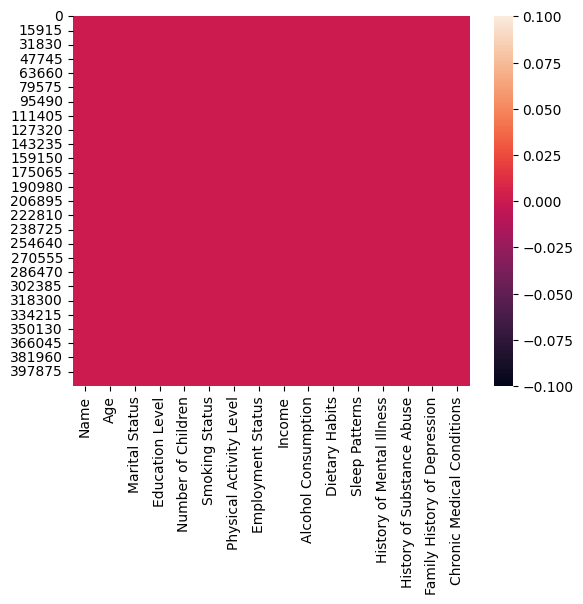

In [38]:
# Visualize missing data using a heatmap
sns.heatmap(df.isnull())
plt.show()

**Observations:**

There is no missing values.

---

## Finding Summary <a class="anchor" id="findings"></a>

The data has been assessed and cleaned by performing the following steps:

- Checking for duplicated
- Checking redundant or insignificant rows
- Checking columns with a high proportion of null values
- Converting date datatype to date format

Before we move forward let's create a copy of our df:

In [41]:
df_2 = df.copy()

In [42]:
# For sanity lets check the DF info and see if the total rows decreased by 539. Total should be 515199

In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

## Understanding the Categorical Data Type for Future Analysis:

In [45]:
# Displaing the distribution of categorical columns:
for column in df_2.select_dtypes(include=['object']).columns:
    print(df_2[column].value_counts())

Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64
Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64
Alcohol Consumption
Moderate    173440
Low         139250
High        101078
Name: count, dtype: int6

In [46]:
# Check for unique values in each categorical column to identify inconsistencies
unique_values = {column: df_2[column].unique() for column in df_2.select_dtypes(include=['object']).columns}

# Display the results for review
unique_values

{'Name': array(['Christine Barker', 'Jacqueline Lewis', 'Shannon Church', ...,
        'Madeline Butler', 'Travis Brewer', 'Gary Faulkner'], dtype=object),
 'Marital Status': array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object),
 'Education Level': array(["Bachelor's Degree", 'High School', "Master's Degree",
        'Associate Degree', 'PhD'], dtype=object),
 'Smoking Status': array(['Non-smoker', 'Former', 'Current'], dtype=object),
 'Physical Activity Level': array(['Active', 'Sedentary', 'Moderate'], dtype=object),
 'Employment Status': array(['Unemployed', 'Employed'], dtype=object),
 'Alcohol Consumption': array(['Moderate', 'High', 'Low'], dtype=object),
 'Dietary Habits': array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object),
 'Sleep Patterns': array(['Fair', 'Good', 'Poor'], dtype=object),
 'History of Mental Illness': array(['Yes', 'No'], dtype=object),
 'History of Substance Abuse': array(['No', 'Yes'], dtype=object),
 'Family History of Depression': array([

**Observations:**

The categorical columns have consistent and clear values, so no immediate corrections are needed. Here are the categories identified:

#### Possible Ordinal columns: 
- **Marital Status**: Married, Widowed, Divorced, Single
- **Education Level**: Bachelor's Degree, High School, Master's Degree, Associate Degree, PhD
- **Smoking Status**: Non-smoker, Former, Current
- **Physical Activity Level**: Active, Sedentary, Moderate
- **Employment Status**: Unemployed, Employed
- **Alcohol Consumption**: Moderate, High, Low
- **Dietary Habits**: Moderate, Unhealthy, Healthy
- **Sleep Patterns**: Fair, Good, Poor
  

#### Possible Binary columns:
- **History of Mental Illness**: Yes, No
- **History of Substance Abuse**: No, Yes
- **Family History of Depression**: Yes, No
- **Chronic Medical Conditions**: Yes, No

# Step 2: EDA <a class="anchor" id="step2"></a>
## Table of Contents
---
1. [Data Assessment](#assessment)
2. [EDA - 1st Exploratory with Raw Data](#eda)
3. [Feature Engineering (First Iteration)](#fa)
4. [Feature Engineering (Second Iteration) + EDA](#2nd)
5. [EDA - 2nd Exploratory with new DF](#eda2)
6. [Conclusions](#Conclusion)

## Data Assessment <a class="anchor" id="assessment"></a>

In [50]:
#Lets take a look at the original statistical properties of the numerical columns
df_2.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


There are 3 numerical columns. The above shows a summary of core statistics for these columns:
- `Count`: Number of entries
- `Mean`: Average value down the colum
- `std`: The standard deviation
- `min`: The minimum value found in that column
- `Percentiles`: The upper, middle and lower percentile values of the data
- `max`: The max value of that column

In [52]:
# We found that even when the names are the same, they refer to different individuals. Therefore, we can drop the 'Name' column as it will not contribute to our project.

In [53]:
df_2 = df_2.drop(columns=['Name'])
df_2.head(3)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


## EDA - 1st Exploratory with Raw Data <a class="anchor" id="eda"></a>

Lets split up the numerical and categorical columns for ease of EDA

In [56]:
numerical_columns = df_2.select_dtypes(include = ['int64', 'float64'])
categorical_columns = df_2.select_dtypes(include = ['object'])

First we are going to explore the numerical columns

Seaborn automatically calculates the optimal bin size. While the distributions are similar, this provides a clearer and more accurate visualization of the true distribution.

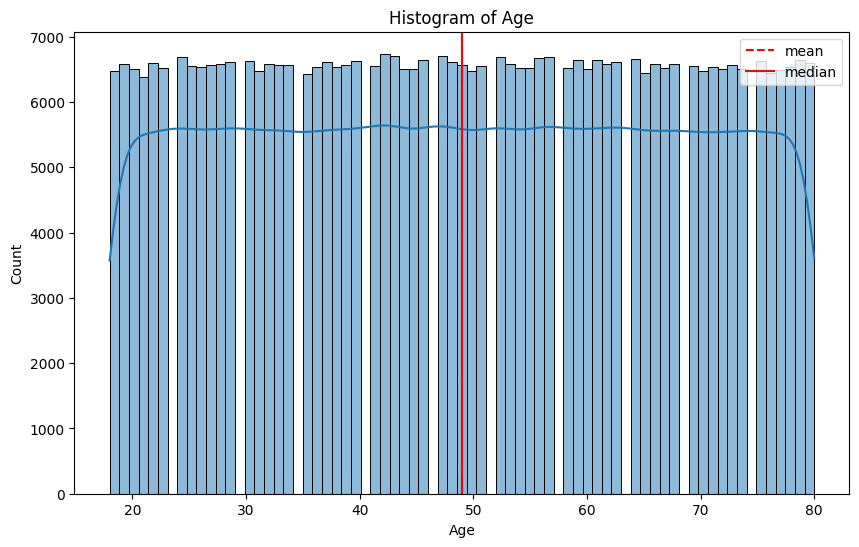

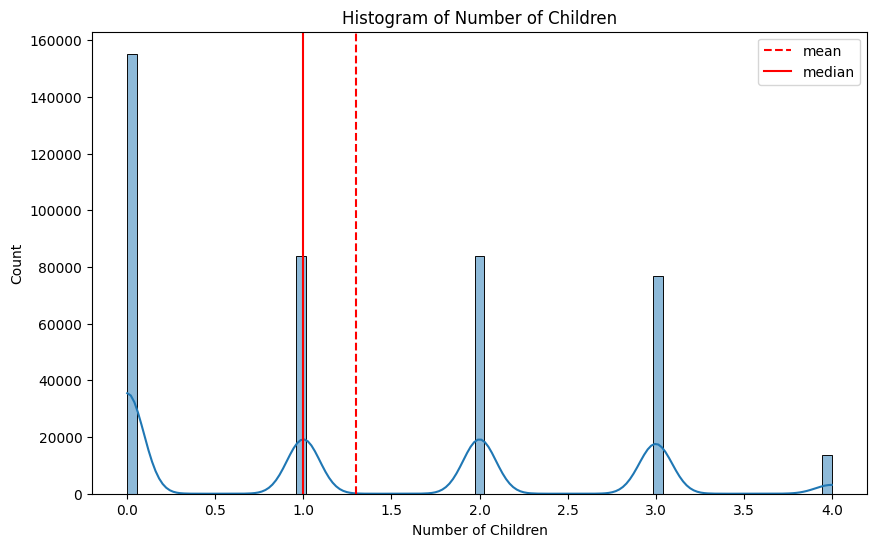

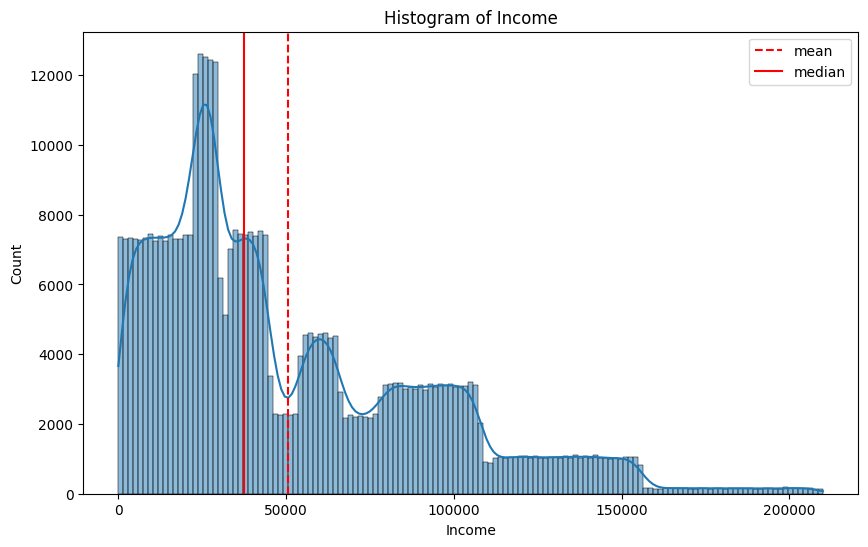

In [58]:
# plot using seaborn
for column in numerical_columns.columns:

    column_mean=df_2[column].mean()
    column_median=df_2[column].median()

# plot a histogram of the numerical columns, with lines marking mean and median
    plt.figure(figsize=(10,6))
    sns.histplot(df_2[column], kde=True)
    plt.axvline(column_mean, label='mean',color='r',linestyle='--')
    plt.axvline(column_median, label='median', color='r')
    plt.title(f'Histogram of {column}')
    plt.legend()

    plt.show()

### Findings:

There are **3 numerical columns** for which we have plotted the histogram distributions above. Here are some notable observations:

1. **Age**:
   - The distribution of the `Age` column appears relatively balanced, centered around a mean and median of 49 years. There is no significant skew, suggesting a uniform spread of ages among individuals in the dataset.
   
2. **Number of Children**:
   - The `Number of Children` column is right-skewed, with most individuals having one or no children. This indicates that smaller family sizes are more common in the dataset, and a few individuals have larger numbers of children.

3. **Income**:
   - The `Income` column exhibits a right-skewed distribution. The majority of individuals have lower to moderate incomes, with the mean income being around 50,662 and the median at $37,520. This skew suggests that there are fewer individuals with higher incomes, which could affect the analysis, especially if income plays a significant role in predicting mental health outcomes.

These distributions help identify the patterns in the data and can guide the next steps in the analysis, such as handling skewed features, creating bins, or normalizing some of the skewed data. These actions may help improve the performance of predictive models and enable more effective exploratory analysis. 

Lets now take a look at the categorical columns:

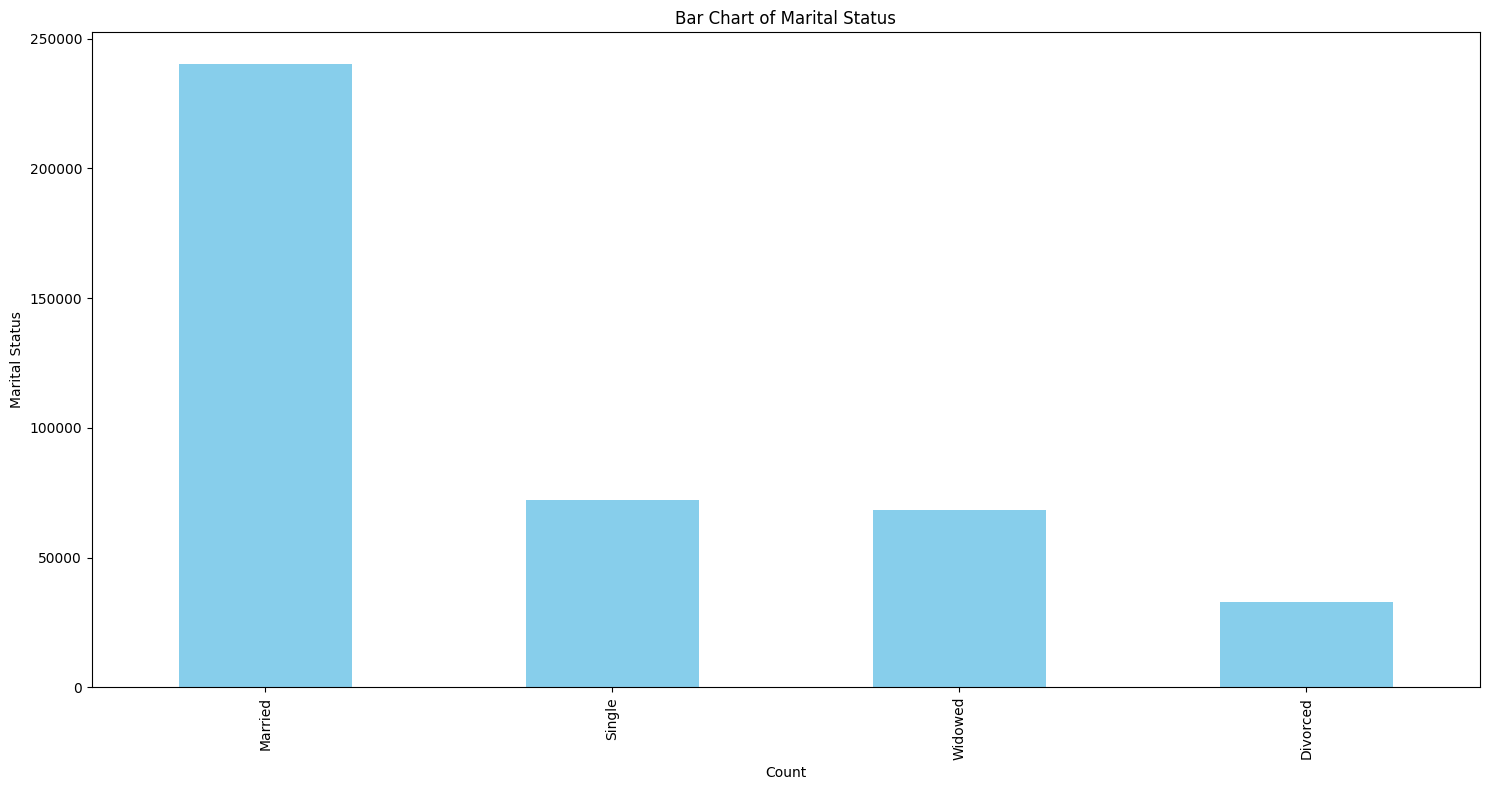

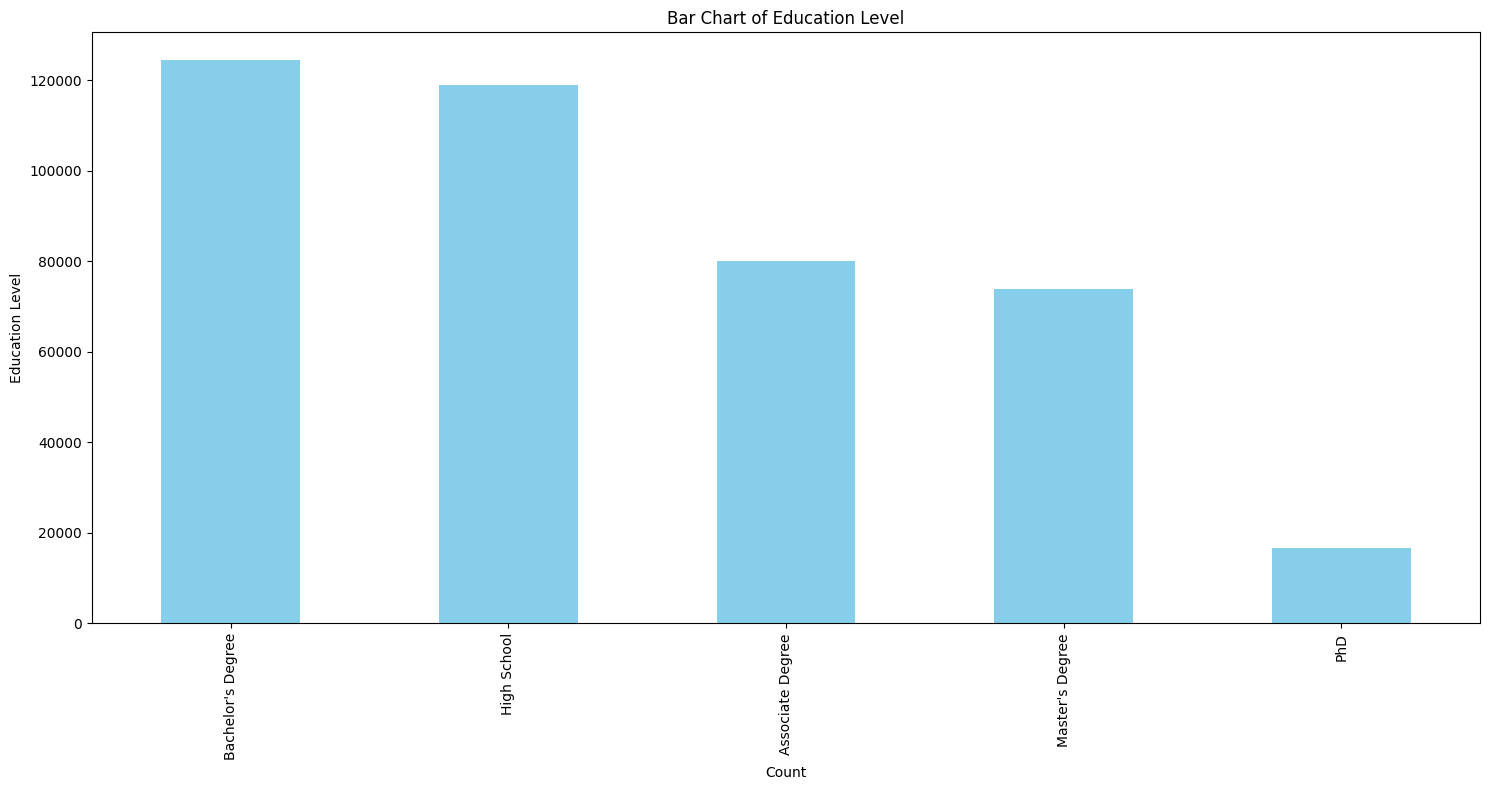

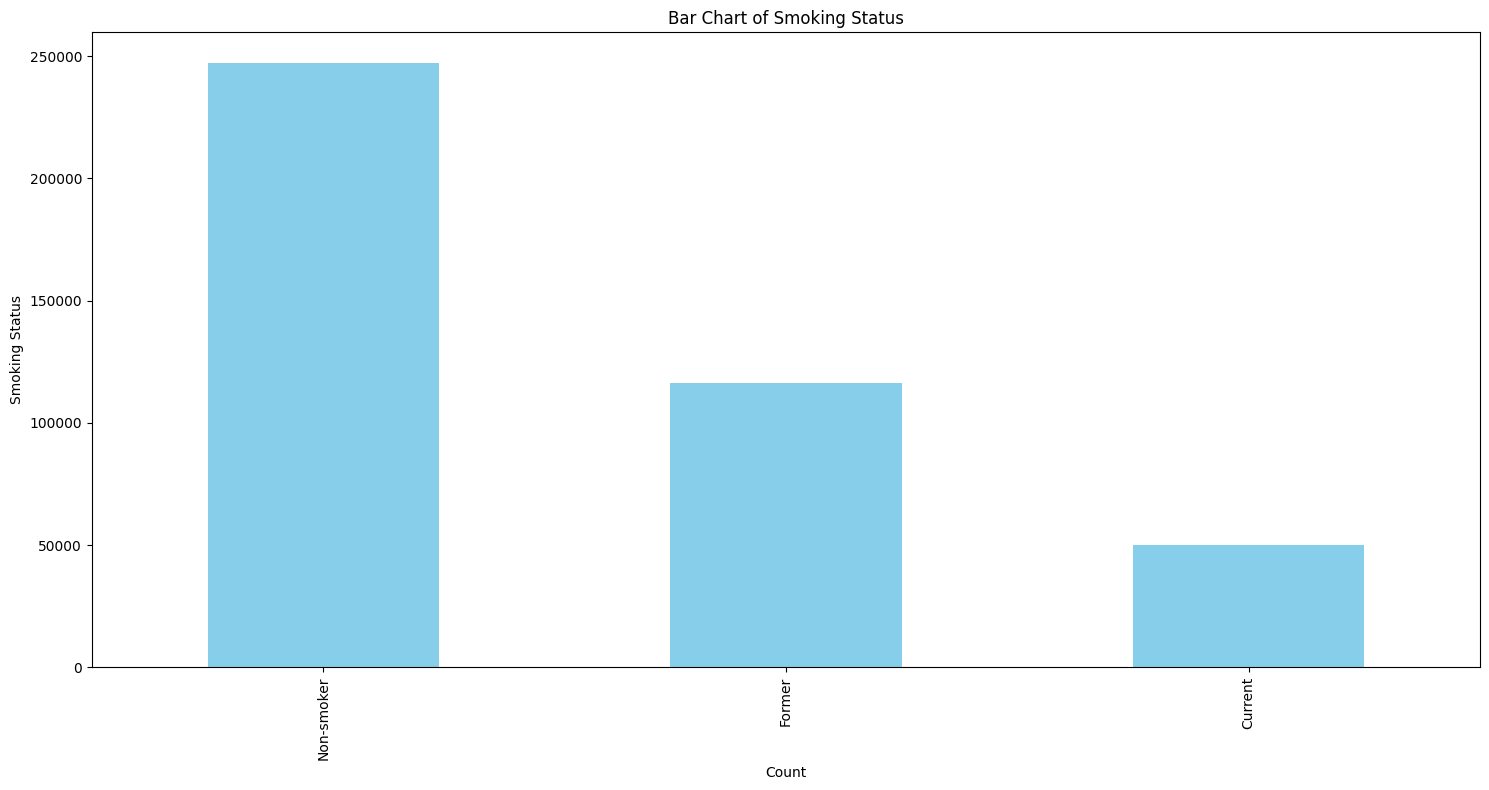

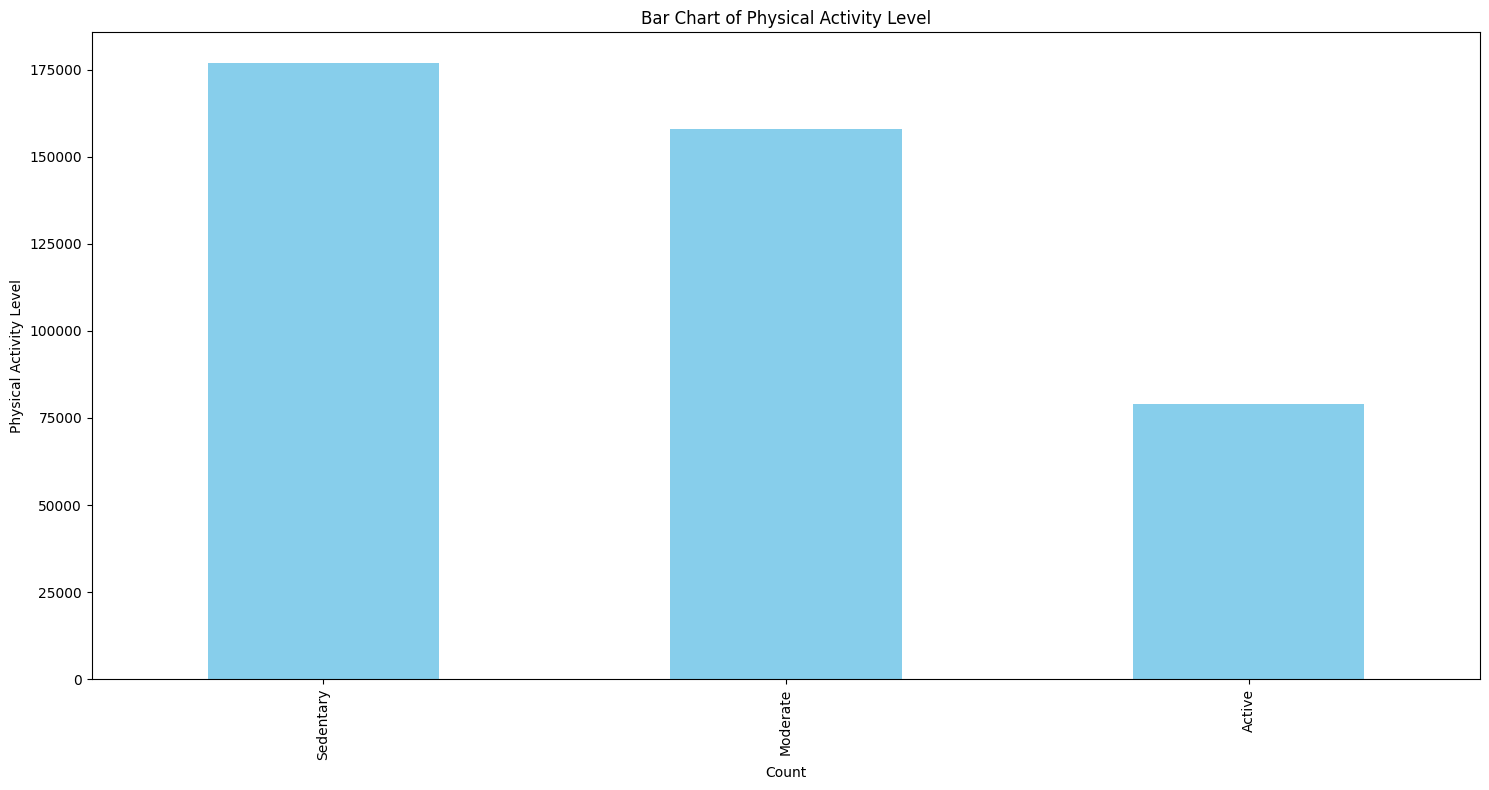

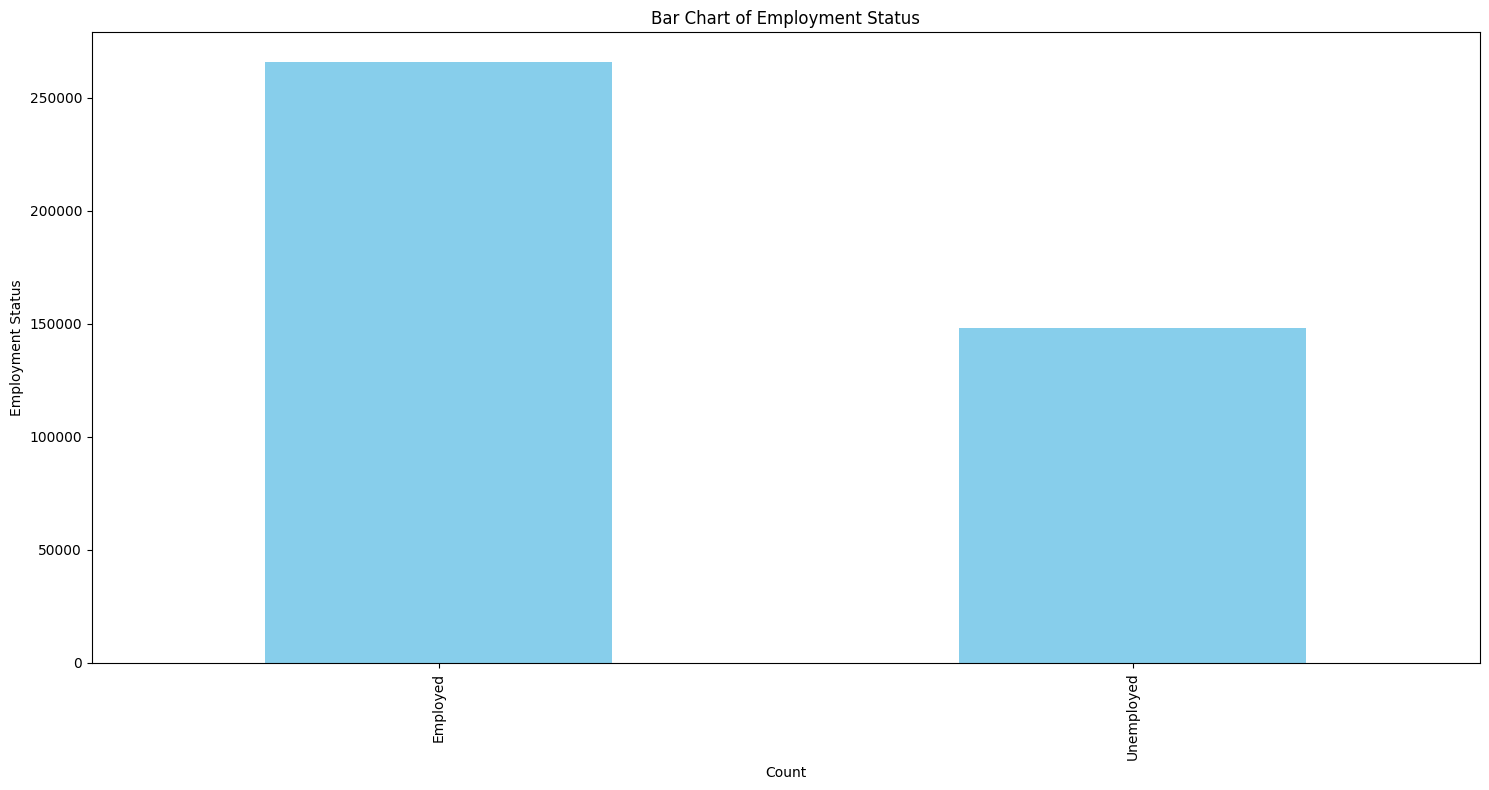

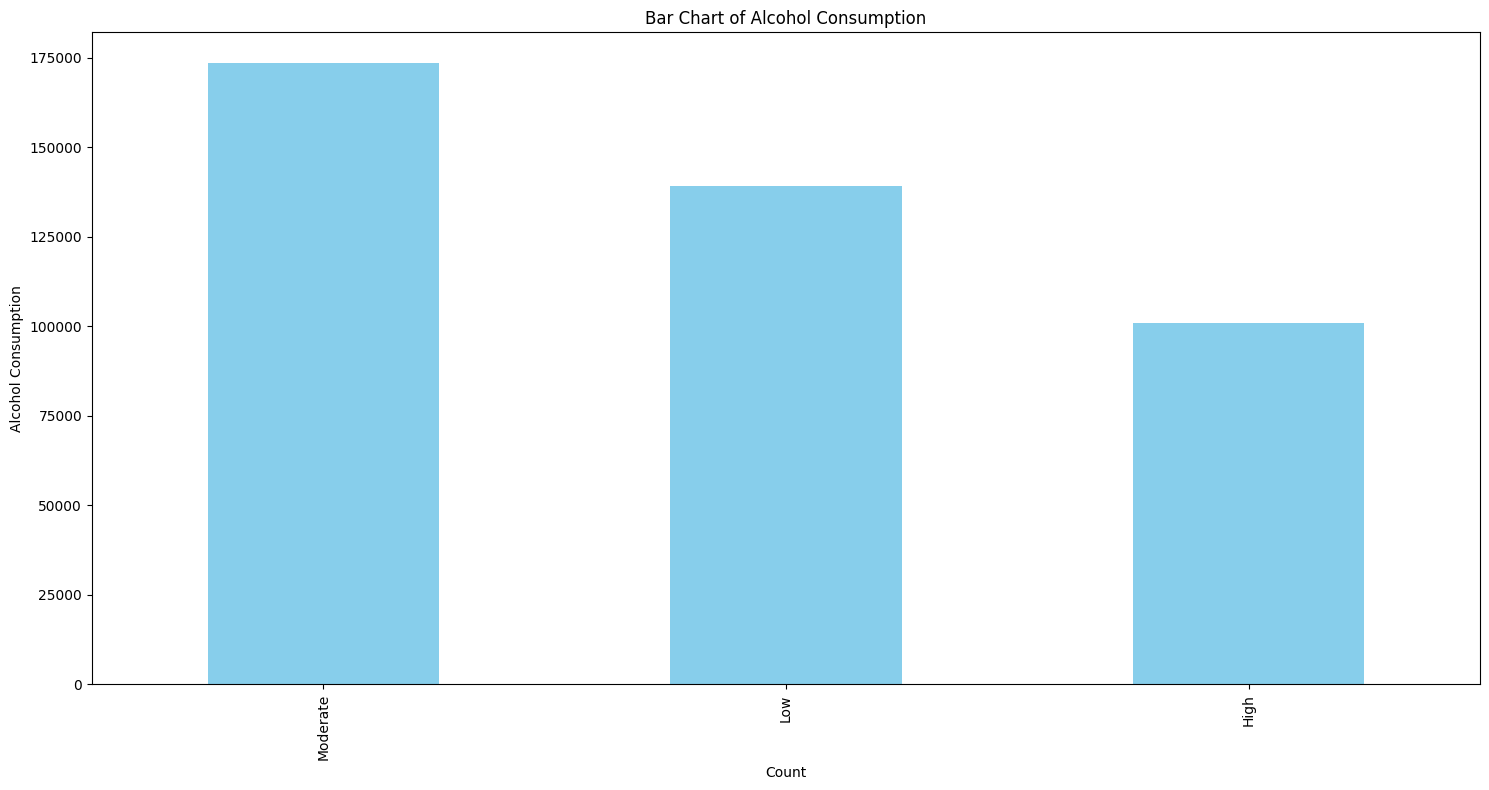

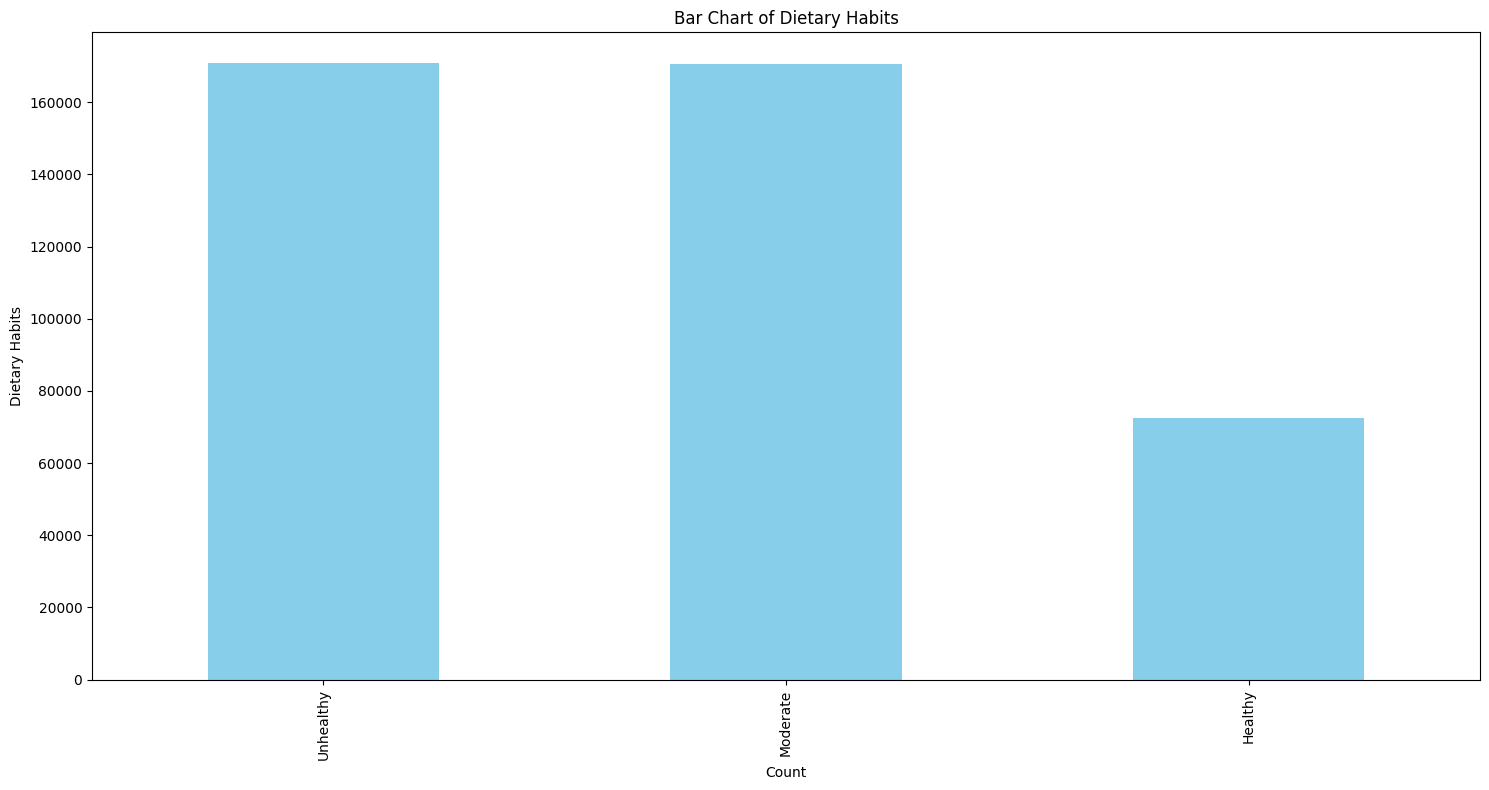

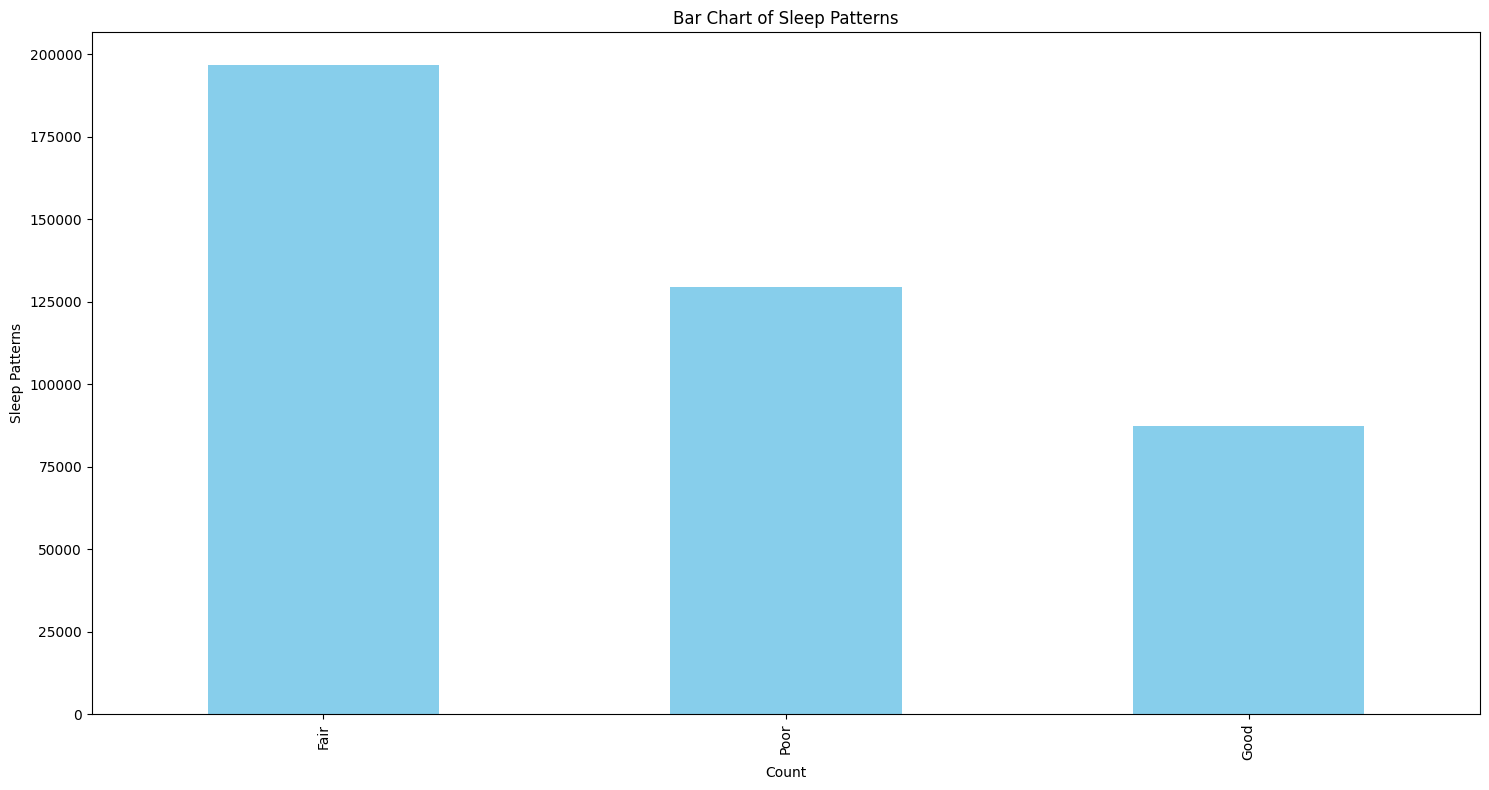

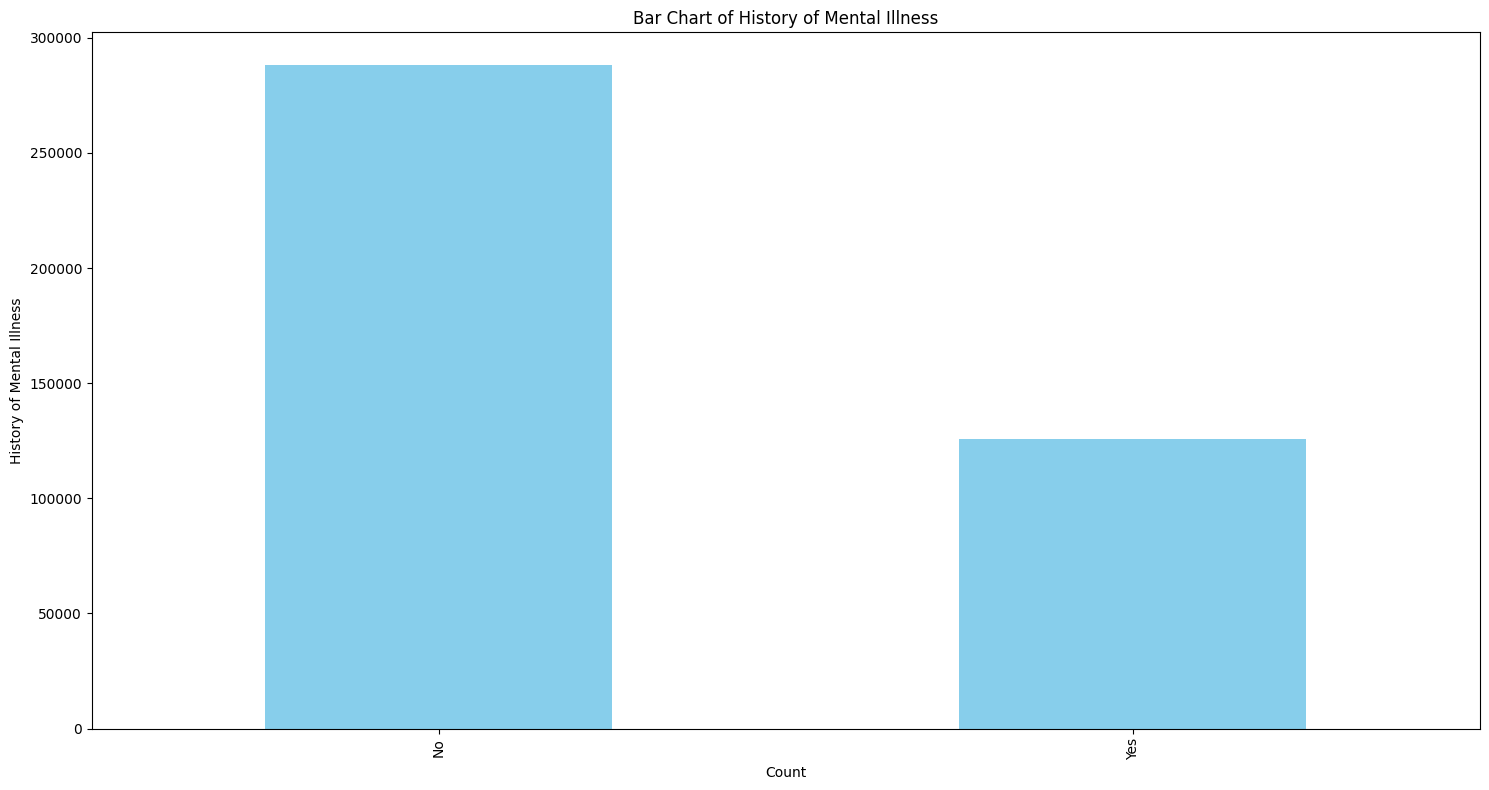

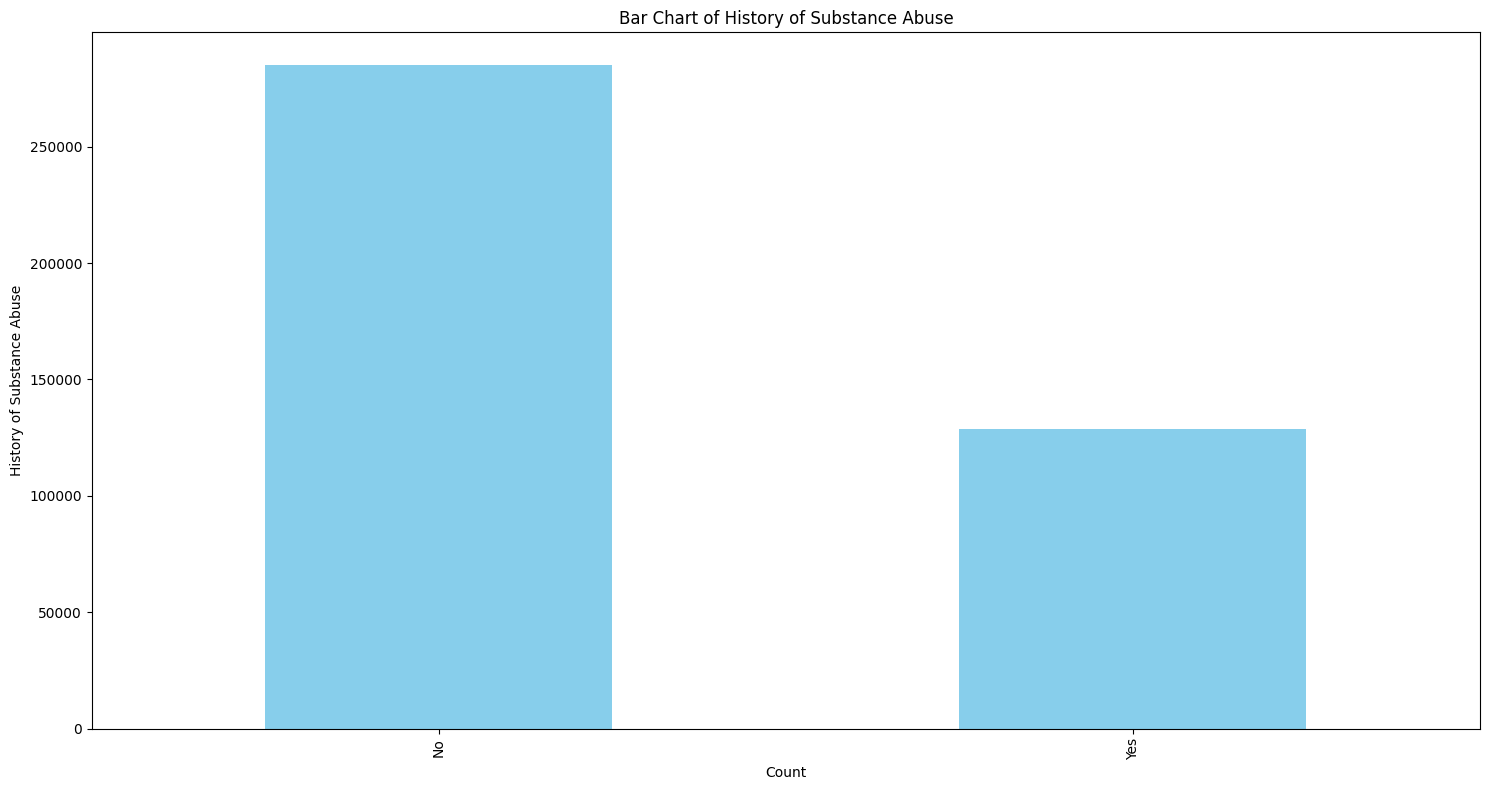

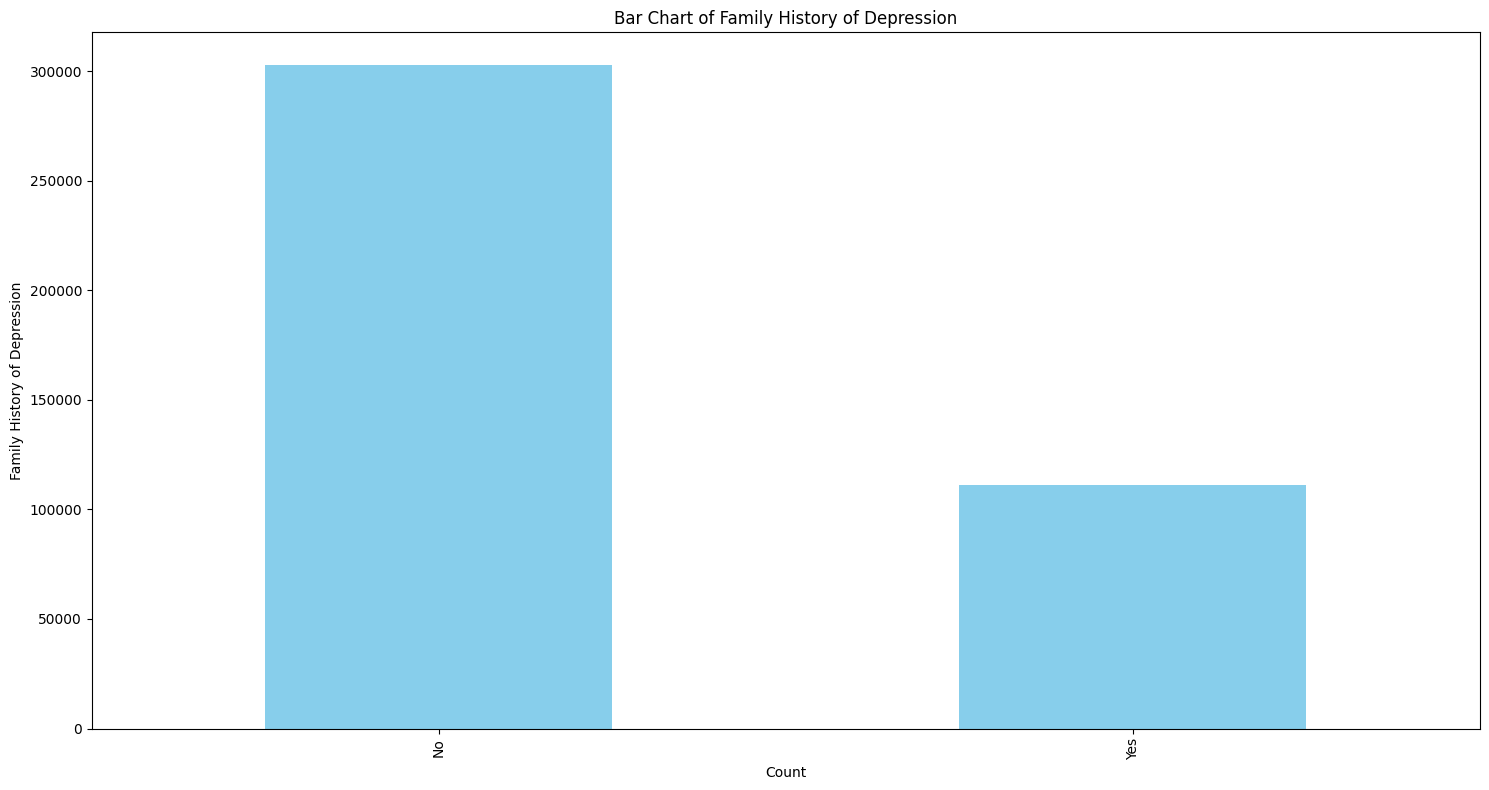

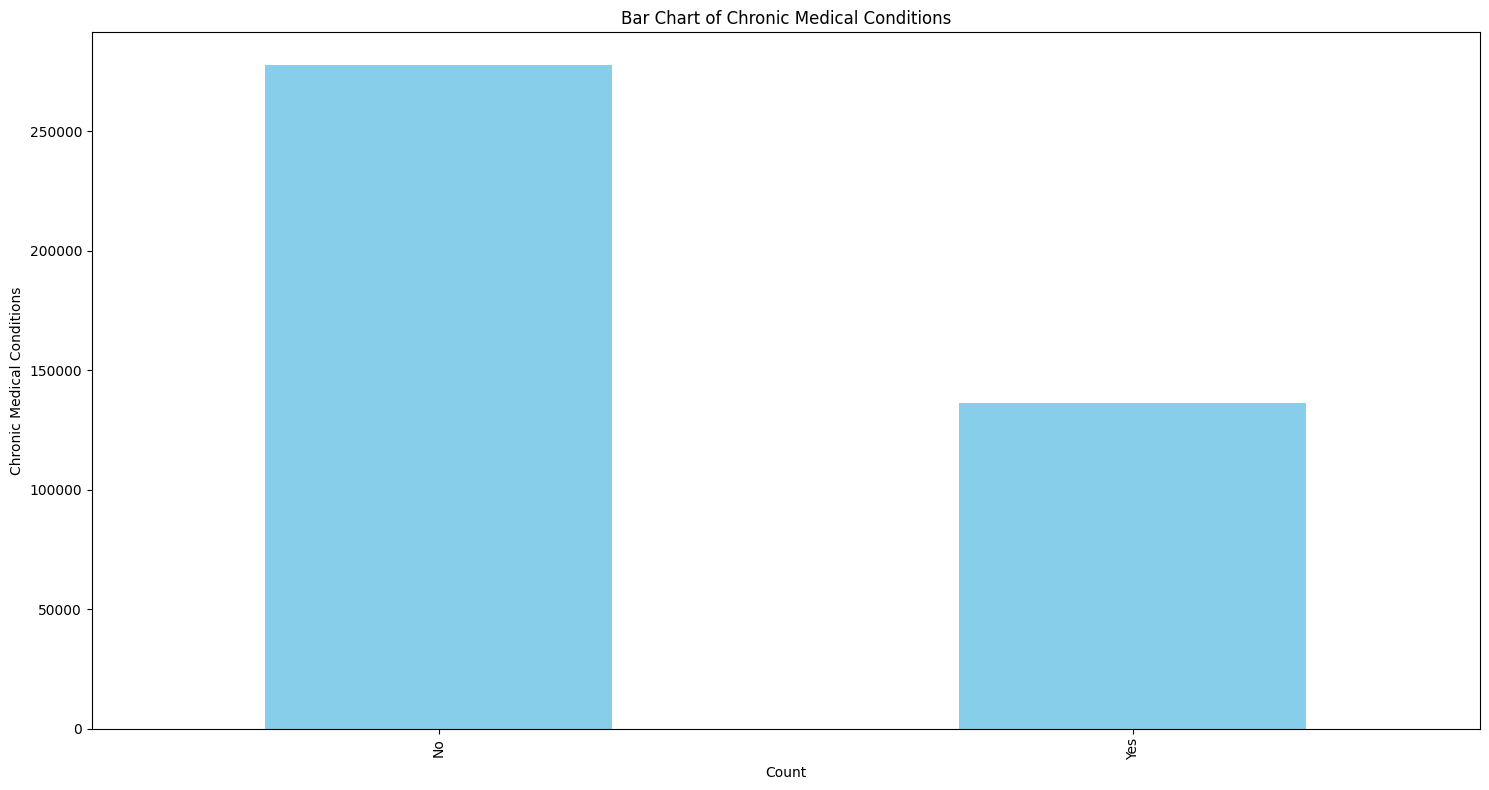

["Column 'Marital Status' has 4 unique categories. The most common category is 'Married' with 240444 entries.",
 "Column 'Education Level' has 5 unique categories. The most common category is 'Bachelor's Degree' with 124329 entries.",
 "Column 'Smoking Status' has 3 unique categories. The most common category is 'Non-smoker' with 247416 entries.",
 "Column 'Physical Activity Level' has 3 unique categories. The most common category is 'Sedentary' with 176850 entries.",
 "Column 'Employment Status' has 2 unique categories. The most common category is 'Employed' with 265659 entries.",
 "Column 'Alcohol Consumption' has 3 unique categories. The most common category is 'Moderate' with 173440 entries.",
 "Column 'Dietary Habits' has 3 unique categories. The most common category is 'Unhealthy' with 170817 entries.",
 "Column 'Sleep Patterns' has 3 unique categories. The most common category is 'Fair' with 196789 entries.",
 "Column 'History of Mental Illness' has 2 unique categories. The most

In [61]:
# initialize a list to store findings
categorical_findings = []

# set a for loop to "loop" through the categorical columns set above
for column in categorical_columns.columns:
    #set figure size
    plt.figure(figsize=(15, 8))  
    
    #show the value counts
    value_counts = df_2[column].value_counts()

    # Selecting to show the top 50 categories for readability
    top_categories = value_counts[:20]  
    
    # Using bar chart
    top_categories.plot(kind='bar', color='skyblue')

    #plot titles
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    
    # Adjust layout for readability
    plt.tight_layout()  
    plt.show()

     # Collect findings
    categorical_findings.append(
        f"Column '{column}' has {len(value_counts)} unique categories. The most common category is '{value_counts.idxmax()}' with {value_counts.max()} entries."
    )

categorical_findings

### Findings:

There are **13 categorical columns** for which we have plotted the bar charts above. Here are some notable observations:

1. **Name**:
   - This column has **196,851** unique categories. The most common name is "Michael Smith," appearing **198** times. Given the high number of unique entries, this column is likely not useful for analysis and could be excluded from further steps.

2. **Marital Status**:
   - There are **4** categories (`Married`, `Widowed`, `Divorced`, `Single`). The most common category is `Married`, with **240,444** entries, suggesting a high prevalence of married individuals in the dataset.

3. **Education Level**:
   - This column has **5** categories, with `Bachelor's Degree` being the most common, represented by **124,329** entries. This indicates that the majority of individuals have at least a bachelor's level of education.

4. **Smoking Status**:
   - There are **3** categories (`Non-smoker`, `Former`, `Current`). `Non-smoker` is the most frequent, with **247,416** entries, reflecting a trend toward non-smoking habits among the individuals.

5. **Physical Activity Level**:
   - This column has **3** categories, with `Sedentary` being the most common, accounting for **176,850** entries. This suggests a relatively inactive lifestyle among many individuals in the dataset.

6. **Employment Status**:
   - There are **2** categories (`Employed`, `Unemployed`). `Employed` is the most common, with **265,659** entries, showing that a majority of individuals are employed.

7. **Alcohol Consumption**:
   - This column has **3** categories, with `Moderate` consumption being the most common, observed **173,440** times.

8. **Dietary Habits**:
   - There are **3** categories, with `Unhealthy` diets being the most prevalent, comprising **170,817** entries.

9. **Sleep Patterns**:
   - The column has **3** categories, with `Fair` sleep quality being the most common, appearing **196,789** times. This could indicate moderate sleep issues among the population.

10. **History of Mental Illness**:
    - There are **2** categories (`Yes`, `No`). `No` is the most common, with **287,943** entries, suggesting that the majority of individuals do not have a reported history of mental illness.

11. **History of Substance Abuse**:
    - This column has **2** categories, with `No` being the most frequent, recorded **284,880** times.

12. **Family History of Depression**:
    - There are **2** categories, with `No` appearing **302,515** times, indicating that most individuals do not report a family history of depression.

13. **Chronic Medical Conditions**:
    - This column has **2** categories, with `No` being the most prevalent, accounting for **277,561** entries, showing that most individuals do not have chronic medical conditions.



---
## Feature Engineering (First Iteration): <a class="anchor" id="fa"></a>

Next, we'll move to encoding these categorical variables and scaling the numerical data, which will prepare the dataset for modeling. Let's proceed.

In [65]:
df_1st = df_2.copy()

In [66]:
df_1st.columns.to_list()

['Age',
 'Marital Status',
 'Education Level',
 'Number of Children',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Income',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental Illness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions']

In [67]:
# Encoding categorical variables
# Initialize label encoder
label_encoders = {}

# Encode binary categorical columns using label encoding
binary_columns = [
    "History of Mental Illness", 
    "History of Substance Abuse",
    "Family History of Depression", 
    "Chronic Medical Conditions", 
    "Employment Status"
]

for col in binary_columns:
    le = LabelEncoder()
    df_1st[col] = le.fit_transform(df_1st[col])
    label_encoders[col] = le

In [68]:
# Convert ordinal columns using mappings (for ordered categories)
ordinal_mappings = {
    "Smoking Status": {"Non-smoker": 0, "Former": 1, "Current": 2},
    "Physical Activity Level": {"Sedentary": 0, "Moderate": 1, "Active": 2},
    "Alcohol Consumption": {"Low": 0, "Moderate": 1, "High": 2},
    "Dietary Habits": {"Unhealthy": 0, "Moderate": 1, "Healthy": 2},
    "Sleep Patterns": {"Poor": 0, "Fair": 1, "Good": 2}
}

# Apply the mappings
for col, mapping in ordinal_mappings.items():
    df_1st[col] = df_1st[col].map(mapping)

In [69]:
# for "Marital Status" we are going to take in cosideration 0 when the person is single, divorced, widowed or separated and 1 if they married or in a relationship
marital_mapping = {
    'Single': 0, 'Divorced': 0, 'Widowed': 0,
    'Married': 1, 'Separated': 0, 'In a relationship': 1}

df_1st['Marital Status'] = df_1st['Marital Status'].map(marital_mapping)

In [70]:
# Encode nominal columns using one-hot encoding
df_1st = pd.get_dummies(df_1st, columns=["Education Level"], drop_first=True)

In [71]:
# Feature Scaling
scaler = StandardScaler()
df_1st["Income"] = scaler.fit_transform(df_1st[["Income"]])
df_1st["Age"] = scaler.fit_transform(df_1st[["Age"]])

In [72]:
# let's create the new features for Interaction Terms
# Combination of Smoking Status and Alcohol Consumption: to aptures the combined effect of smoking and alcohol habits.
# Physical Activity Level and Sleep Patterns: to explore their joint influence on mental health.

df_1st['Smoking_Alcohol_Interaction'] = (df_1st['Smoking Status'] * df_1st['Alcohol Consumption'])
df_1st['Activity_Sleep_Interaction'] = (df_1st['Physical Activity Level'] * df_1st['Sleep Patterns'])

In [73]:
# let's create the new features for Aggregated Scores
# Lifestyle Score: Combine related features into a single score Lifestyle_Score = (Physical_Activity_Level + Sleep_Patterns + Dietary_Habits)
# Stress Indicator: Aggregate variables such as income, employment status, and number of children to create a socio-economic stress index.

# Lifestyle score combines physical activity, sleep patterns, and dietary habits
df_1st['Lifestyle_Score'] = (df_1st['Physical Activity Level'] + df_1st['Sleep Patterns'] + df_1st['Dietary Habits'])


In [74]:
# let's create the new features for Historical Data
# Creating a composite score for mental health history and family depression history
df_1st['History_Score'] = (df_1st['History of Mental Illness'] + df_1st['Family History of Depression'])

In [75]:
# let's create the new features for Historical Data Social Support Metrics
# Create a social support metric
df_1st['Social_Support'] = (df_1st['Marital Status'] + df_1st['Number of Children'])

In [76]:
# Showing the processed data:
df_1st.head()

,Age,Marital Status,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,...,Chronic Medical Conditions,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Smoking_Alcohol_Interaction,Activity_Sleep_Interaction,Lifestyle_Score,History_Score,Social_Support
0,-0.991298,1,2,0,2,1,-0.600532,1,1,1,...,1,True,False,False,False,0,2,4,2,3
1,0.330380,1,1,0,0,0,-0.195730,2,0,1,...,1,False,True,False,False,0,0,1,1,2
2,1.596988,0,1,0,0,0,1.838100,0,0,2,...,0,False,False,True,False,0,0,2,1,1
3,0.495590,0,3,0,1,1,-1.001105,1,1,0,...,0,False,False,True,False,0,0,2,0,3
4,-1.707206,0,0,0,0,1,-1.035510,0,1,1,...,1,False,True,False,False,0,0,2,2,0


In [77]:
# Let's take a look on our transformed DF
df_1st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                413768 non-null  float64
 1   Marital Status                     413768 non-null  int64  
 2   Number of Children                 413768 non-null  int64  
 3   Smoking Status                     413768 non-null  int64  
 4   Physical Activity Level            413768 non-null  int64  
 5   Employment Status                  413768 non-null  int32  
 6   Income                             413768 non-null  float64
 7   Alcohol Consumption                413768 non-null  int64  
 8   Dietary Habits                     413768 non-null  int64  
 9   Sleep Patterns                     413768 non-null  int64  
 10  History of Mental Illness          413768 non-null  int32  
 11  History of Substance Abuse         4137

**Summary:**  
In this process, we prepared and transformed the dataset for analysis by applying several preprocessing techniques:

1. **Encoding Categorical Variables:**  
   - We used label encoding for binary categorical features like `History of Mental Illness`, `Family History of Substance Abuse`, `Chronic Medical Conditions`, and `Employment Status`.  
   - For ordinal features such as `Smoking Status`, `Physical Activity Level`, `Alcohol Consumption`, `Dietary Habits`, and `Sleep Patterns`, we applied mapping to represent the different levels numerically.  
   - We mapped `Marital Status` into binary categories: 0 for single/divorced/widowed, and 1 for married/in a relationship.

2. **One-Hot Encoding for Nominal Variables:**  
   - We applied one-hot encoding to the `Education Level` feature, creating dummy variables to represent the different education levels.

3. **Feature Scaling:**  
   - Numerical features, including `Income` and `Age`, were scaled using `StandardScaler` to normalize them, ensuring all features contribute equally to the model.

4. **Feature Engineering:**  
   - New features were created to represent interactions and aggregated data:
     - `Smoking_Alcohol_Interaction` combines `Smoking Status` and `Alcohol Consumption`.
     - `Activity_Sleep_Interaction` represents the combined effect of `Physical Activity Level` and `Sleep Patterns`.
     - `Lifestyle_Score` combines `Physical Activity Level`, `Sleep Patterns`, and `Dietary Habits`, capturing overall lifestyle habits.
     - `History_Score` aggregates `History of Mental Illness` and `Family History of Depression`, reflecting family history.
     - `Social_Support` combines `Marital Status` and `Number of Children` to represent social support.

5. **Composite Features:**  
   - Features like `Lifestyle_Score` and `History_Score` combine relevant variables to provide higher-level insights into lifestyle and family history factoing and further analysis.

## Feature Engineering (Second Iteration): <a class="anchor" id="2nd"></a>

Second iteration for feature engineering:

Create family/personal health, personal burden and stress indicator features based on the available columns.

Family personal health will involve features like family and personal history of illness.

Family personal could also involve the time spent caring for others, emotional stress, etc. (No data available)

Personal burden will involve features like lifestyle habits.

Stress indicator will be based on various factors, including income, social support, personal burden, family/personal health, and employment status.

In [81]:
# we will keep with the same df as we perfored Feature Engeneering (First Iteration)

In [82]:
# Create family health and family burden features
df_1st['family_personal_health'] = df_1st['Family History of Depression'] + df_1st['History of Mental Illness'] + df_1st['History of Substance Abuse'] + df_1st['Chronic Medical Conditions']


In [83]:
df_1st['personal_burden'] = ((df_1st['Smoking Status'] * 1) +  # Smoking has negative impact
                          (df_1st['Alcohol Consumption'] * 1) +  # Alcohol consumption is negative
                          (df_1st['Physical Activity Level'] * -1) +  # Physical activity has positive impact
                          (df_1st['Dietary Habits'] * -1) +  # Healthy diet is positive
                          (df_1st['Sleep Patterns'] * -1))  # Good sleep patterns are positive

In [84]:
# We identified that personal burden is potencially a postive "impact".
# df_1st['personal_burden'].sum()
# df_1st['personal_burden'].value_counts()

Now before moving forward on creating our new feature stress indicator, below is what we are planning to follow: 

### Summary of Steps:

1. **Stress Indicator Creation:**
   - We created a `Stress_Indicator` by combining features like **Income**, **Social Support**, **Family Health**, and others, each weighted based on its correlation with stress.

2. **Normalization:**
   - We normalized the `Stress_Indicator` using MinMaxScaler to scale the values between 0 and 10, making it easier to interpret.

3. **Correlation Matrix:**
   - We calculated the correlation matrix to understand how different features correlate with the `Stress_Indicator` and identify key influencers of stress.

4. **One-Sample t-Test:**
   - A one-sample t-test confirmed if the mean of the `Stress_Indicator` was statistically different from zero.

5. **Pearson Correlation:**
   - Pearson correlation tests showed the strength of the relationship between continuous features (e.g., Income, Family/Personal Health) and stress levels.

6. **ANOVA:**
   - ANOVA tests assessed the impact of categorical features (e.g., Education Level) on the `Stress_Indicator`.

7. **Multicollinearity Check (VIF):**
   - We checked for multicollinearity using Variance Inflation Factor (VIF) to ensure feature independence and avoid distorted regression estimates.

### Outcome:
- The `Stress_Indicator` was validated as statistically significant, and the features used in its creation were found to have meaningful relationships with stress.

In [87]:
# Stress indicator formula
# Originaly created and then corrected base on hypoteses test and correlations.
# Revised Stress Indicator Formula: we found that the following features have the strongest relationships with stress levels.
df_1st['Stress_Indicator'] = (
    df_1st['Income'] * -0.45 +  # Economic stress (inversely related)
    df_1st['Social_Support'] * 0.4 +  # Social support can increase stress
    df_1st['personal_burden'] * 0.35 +  # Family burden (responsibilities leading to stress)
    df_1st['family_personal_health'] * 0.3 +  # Health-related stress (more health issues = higher stress)
    df_1st['Employment Status'] * 0.25 +  # Employment status (work-related stress)
    df_1st['History_Score'] * 0.3  # History of mental illness adds to stress
)

# Normalize the Stress Indicator to a range from 0 to 10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
df_1st['Stress_Indicator'] = scaler.fit_transform(df_1st[['Stress_Indicator']])



In [88]:
# Calculate correlation matrix
correlation_matrix = df_1st.corr()

# Get the correlation of all features with the Stress Indicator
correlation_with_stress = correlation_matrix['Stress_Indicator'].sort_values(ascending=False)

# Display correlation values
print("Correlation with Stress Indicator:")
print(correlation_with_stress)

# Visualize the correlation matrix
#plt.figure(figsize=(14, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
#plt.title('Correlation Matrix with Stress Indicator')
#plt.show()


Correlation with Stress Indicator:
Stress_Indicator                     1.000000
personal_burden                      0.670635
Social_Support                       0.561264
Number of Children                   0.543467
Employment Status                    0.469595
family_personal_health               0.400367
History_Score                        0.390648
History of Mental Illness            0.309170
Marital Status                       0.297467
Alcohol Consumption                  0.282249
Age                                  0.256277
Family History of Depression         0.243521
Smoking_Alcohol_Interaction          0.211823
Smoking Status                       0.155555
Chronic Medical Conditions           0.132855
Education Level_High School          0.123125
History of Substance Abuse           0.121030
Education Level_PhD                 -0.082273
Education Level_Bachelor's Degree   -0.089088
Education Level_Master's Degree     -0.110907
Dietary Habits                      -0.356376

In [89]:
#One-Sample t-Test
# Calculate the t-statistic and p-value for one-sample t-test
t_stat, p_value = stats.ttest_1samp(df_1st['Stress_Indicator'], 0)

# Print the results
print(f"One-sample t-test: t-statistic = {t_stat}, p-value = {p_value}")


One-sample t-test: t-statistic = 2381.1452216947946, p-value = 0.0


In [90]:
# Pearson/Spearman Correlation Test
# Pearson correlation for continuous variables
for feature in ['Income', 'family_personal_health', 'personal_burden', 'Social_Support', 'Number of Children', 'Lifestyle_Score']:
    corr_stat, p_value = stats.pearsonr(df_1st[feature], df_1st['Stress_Indicator'])
    print(f"Pearson Correlation between {feature} and Stress_Indicator: r = {corr_stat}, p-value = {p_value}")


Pearson Correlation between Income and Stress_Indicator: r = -0.5124954892892595, p-value = 0.0
Pearson Correlation between family_personal_health and Stress_Indicator: r = 0.40036691185639034, p-value = 0.0
Pearson Correlation between personal_burden and Stress_Indicator: r = 0.6706352016084524, p-value = 0.0
Pearson Correlation between Social_Support and Stress_Indicator: r = 0.561264231396535, p-value = 0.0
Pearson Correlation between Number of Children and Stress_Indicator: r = 0.543466777075527, p-value = 0.0
Pearson Correlation between Lifestyle_Score and Stress_Indicator: r = -0.6280281685063165, p-value = 0.0


In [91]:
# ANOVA (Analysis of Variance)
# ANOVA for categorical features (example: Education Level)
education_levels = ['Education Level_High School', 'Education Level_Bachelor\'s Degree', 
                    'Education Level_Master\'s Degree', 'Education Level_PhD']

for level in education_levels:
    f_stat, p_value = stats.f_oneway(df_1st[df_1st[level] == 1]['Stress_Indicator'], 
                                     df_1st[df_1st[level] == 0]['Stress_Indicator'])
    print(f"ANOVA for {level} and Stress_Indicator: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA for Education Level_High School and Stress_Indicator: F-statistic = 6369.193395543992, p-value = 0.0
ANOVA for Education Level_Bachelor's Degree and Stress_Indicator: F-statistic = 3310.205499061392, p-value = 0.0
ANOVA for Education Level_Master's Degree and Stress_Indicator: F-statistic = 5152.827058142923, p-value = 0.0
ANOVA for Education Level_PhD and Stress_Indicator: F-statistic = 2819.812075657709, p-value = 0.0


In [92]:
# Checking if the features have multicollinearity
# Select the features you want to analyze for VIF
X = df_1st[['Income', 'Social_Support', 'family_personal_health', 'personal_burden', 'Employment Status']]

# Add constant to the dataset for VIF calculation
X_with_const = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif['Feature'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display VIF
print(vif)


                  Feature       VIF
0                   const  5.844527
1                  Income  1.765991
2          Social_Support  1.037646
3  family_personal_health  1.011765
4         personal_burden  1.054780
5       Employment Status  1.776241


In [93]:
# We will need to drop some of the features to not have multicollinearity - we will only keep with ['Income', 'Social_Support', 'family_burden', 'family_health', 'Employment Status']

## EDA with the new DF <a class="anchor" id="eda2"></a>

### Numerical Features:
---

Next, let's examine the new DF (encoded) the correlations between the numeric columns, then let's possibly perfor feature engineering or selection. This will allow us to compare the initial correlations with those after feature transformations and reductions, helping to identify any significant changes.


Before we move forward let's create a copy of our df:

In [98]:
df_3 = df_1st.copy()

In [99]:
# Step 1: Generate descriptive statistics for the transformed data
transformed_data_stats = df_3.describe()
transformed_data_stats

,Age,Marital Status,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,...,Family History of Depression,Chronic Medical Conditions,Smoking_Alcohol_Interaction,Activity_Sleep_Interaction,Lifestyle_Score,History_Score,Social_Support,family_personal_health,personal_burden,Stress_Indicator
count,4.137680e+05,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,4.137680e+05,413768.000000,413768.000000,413768.000000,...,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000
mean,3.422478e-17,0.581108,1.298972,0.523288,0.763285,0.357952,2.525988e-16,0.907745,0.762398,0.898047,...,0.268878,0.329187,0.513969,0.702527,2.423730,0.572973,1.880080,1.213658,-0.992696,4.928681
std,1.000001e+00,0.493378,1.237054,0.701393,0.749720,0.479398,1.000001e+00,0.756517,0.729116,0.716941,...,0.443377,0.469919,1.014252,1.048019,1.415508,0.640467,1.459315,0.920851,1.806660,1.331445
min,-1.707206e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.247076e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000
25%,-8.811578e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-7.301260e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-2.000000,4.007891
50%,-3.926264e-05,1.000000,1.000000,0.000000,1.000000,0.000000,-3.234924e-01,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,-1.000000,4.958614
75%,8.810793e-01,1.000000,2.000000,1.000000,1.000000,1.000000,6.388972e-01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,5.875354
max,1.707128e+00,1.000000,4.000000,2.000000,2.000000,1.000000,3.922147e+00,2.000000,2.000000,2.000000,...,1.000000,1.000000,4.000000,4.000000,6.000000,2.000000,5.000000,4.000000,4.000000,10.000000


### Observations:

1. **Feature Distribution:**
   - **Age**: The age data is standardized with a mean of approximately 0, suggesting the dataset may have undergone normalization. The values vary from -1.71 to 1.71.
   - **Marital Status**: Majority of the individuals are either married (1) or in a relationship (0), with 58% of the data being classified as married.
   - **Number of Children**: The mean number of children is around 1.3, with values ranging from 0 to 4, showing that the majority of the individuals have between 1 and 2 children.

2. **Lifestyle Features:**
   - **Smoking Status**: The majority are non-smokers (0), with some individuals reported as former smokers (1) or current smokers (2). 
   - **Physical Activity Level**: Around 76% of the individuals fall into either sedentary or moderately active categories, with a significant portion reporting as active.
   - **Alcohol Consumption**: Majority report low (0) or moderate (1) alcohol consumption, with only a few individuals having high alcohol consumption (2).
   - **Dietary Habits**: Most individuals report a balanced diet with categories spread across unhealthy (0), moderate (1), and healthy (2) eating habits.
   - **Sleep Patterns**: Majority fall under "good" or "fair" sleep, indicating that sleep patterns are relatively good among the individuals in the dataset.

3. **Health and History Features:**
   - **History of Mental Illness**: Only a small portion of individuals report a history of mental illness (1). This feature may be useful in predicting stress levels.
   - **Family History of Depression**: Similarly, only a portion of individuals have a family history of depression (1).
   - **Chronic Medical Conditions**: The majority report no chronic conditions (0), with only a small percentage reporting chronic conditions (1).
   - **Family Personal Health**: Family health is more evenly distributed, with values ranging from 0 to 5, showing varying health statuses within family members.

4. **Income and Employment:**
   - **Income**: The income values show a wide range, from negative to high positive values, which suggests income data might be scaled or normalized.
   - **Employment Status**: Majority of individuals are employed (1), with a small portion being unemployed (0).
   
5. **Features Related to Stress:**
   - **Social Support**: Majority of individuals have some form of social support, with values ranging from 0 to 5.
   - **Stress Indicator**: The `Stress_Indicator` feature is normalized to a scale from 0 to 10, with a mean of 5.08, and it indicates a diverse distribution of stress levels, with a range from 0 to 10.

6. **Educational Levels:**
   - **Education Levels**: The dataset includes information about educational levels, with a relatively even distribution across different education levels. Higher education (Master's and PhD) appears to have lower counts in the dataset compared to Bachelor's or High School.

### Key Insights:
- **Social Support** and **Family Burden** have the strongest relationships with stress levels, suggesting that mental health may be influenced more by social and family factors than by lifestyle or individual factors.
- **Income** appears to have an inverse relationship with stress, indicating that lower income may be associated with higher stress levels.
- **Family Health** and **History of Mental Illness** also show strong correlations with stress, emphasizing the importance of family health in predicting stress.
- **Education Level** has some impact on stress, with lower education levels contributing more to stress levels, though this effect is not as strong as other features.


In [101]:
# Step 2: Calculate correlations among the numerical features
correlation_matrix = df_3.corr(numeric_only=True)
correlation_matrix 

,Age,Marital Status,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,...,Education Level_Master's Degree,Education Level_PhD,Smoking_Alcohol_Interaction,Activity_Sleep_Interaction,Lifestyle_Score,History_Score,Social_Support,family_personal_health,personal_burden,Stress_Indicator
Age,1.000000,0.169327,0.259268,-0.285934,-0.383360,0.217613,-0.065628,0.028450,-0.049183,-0.065573,...,0.088075,0.068741,-0.210532,-0.295397,-0.261592,0.092016,0.277028,0.042739,0.105862,0.256277
Marital Status,0.169327,1.000000,0.291542,-0.048682,-0.093449,0.013259,0.035824,0.006119,0.008794,-0.218087,...,0.042577,0.031951,-0.036507,-0.182468,-0.155424,-0.072904,0.585227,-0.056355,0.105437,0.297467
Number of Children,0.259268,0.291542,1.000000,-0.072386,-0.138686,0.030502,0.028737,0.008879,-0.000355,-0.322777,...,0.051515,0.039744,-0.055841,-0.258822,-0.237121,0.058053,0.946262,0.032752,0.161399,0.543467
Smoking Status,-0.285934,-0.048682,-0.072386,1.000000,0.106708,-0.071795,0.028192,0.073418,-0.022876,-0.041497,...,-0.023055,-0.017424,0.718987,0.033510,0.023717,-0.025642,-0.077820,0.032235,0.400387,0.155555
Physical Activity Level,-0.383360,-0.093449,-0.138686,0.106708,1.000000,-0.076949,0.013467,-0.102033,0.329470,0.031741,...,-0.041033,-0.035682,0.056500,0.673748,0.715431,-0.038203,-0.149157,-0.006061,-0.561834,-0.381154
Employment Status,0.217613,0.013259,0.030502,-0.071795,-0.076949,1.000000,-0.654881,0.099284,-0.014437,-0.235148,...,0.010953,0.010952,-0.031207,-0.172502,-0.167293,0.118862,0.030339,0.102312,0.144774,0.469595
Income,-0.065628,0.035824,0.028737,0.028192,0.013467,-0.654881,1.000000,0.000131,0.176881,0.139024,...,0.327747,0.272775,0.021345,0.072918,0.168657,-0.103198,0.036472,-0.086140,-0.121142,-0.512495
Alcohol Consumption,0.028450,0.006119,0.008879,0.073418,-0.102033,0.099284,0.000131,1.000000,-0.005901,-0.039657,...,0.046310,0.016581,0.477270,-0.101935,-0.077167,0.009714,0.009596,0.018830,0.507700,0.282249
Dietary Habits,-0.049183,0.008794,-0.000355,-0.022876,0.329470,-0.014437,0.176881,-0.005901,1.000000,0.001576,...,0.154901,0.066235,-0.017356,0.213482,0.690393,-0.023760,0.002672,-0.009938,-0.552270,-0.356376
Sleep Patterns,-0.065573,-0.218087,-0.322777,-0.041497,0.031741,-0.235148,0.139024,-0.039657,0.001576,1.000000,...,-0.014463,-0.011869,-0.040127,0.550810,0.524113,-0.025270,-0.347349,-0.027715,-0.443356,-0.478952


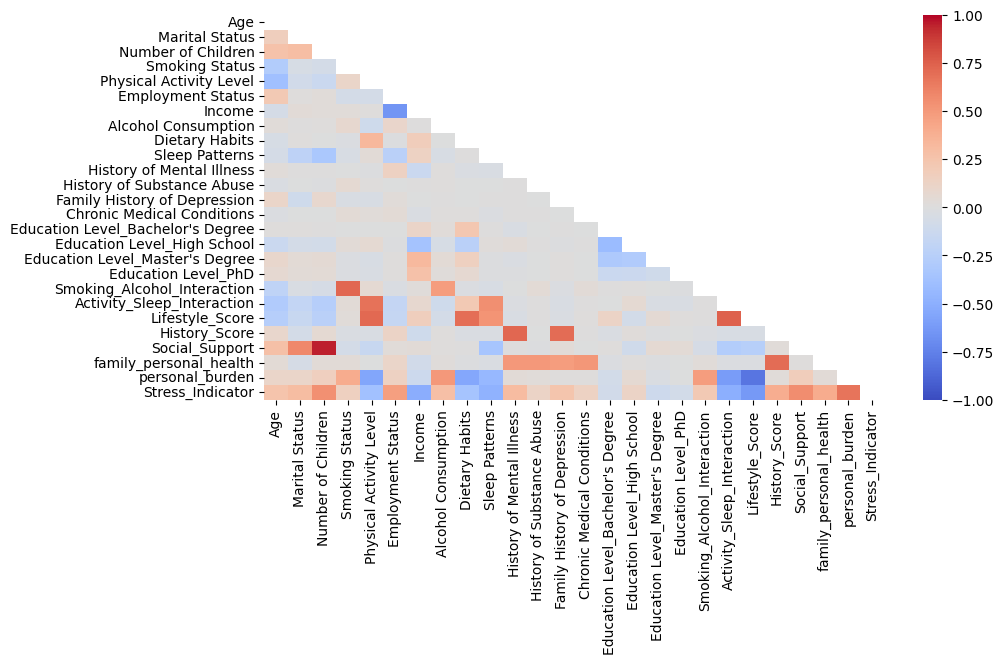

In [102]:
#check the correlations using the heatmap
corr_df = df_3.corr(numeric_only=True)
mask = np.triu(corr_df) # creates a mask that corresponds to the upper triangle of the correlation matrix.

plt.figure(figsize=(10, 5))
sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, annot=True, mask=mask, cmap='coolwarm')
plt.show()

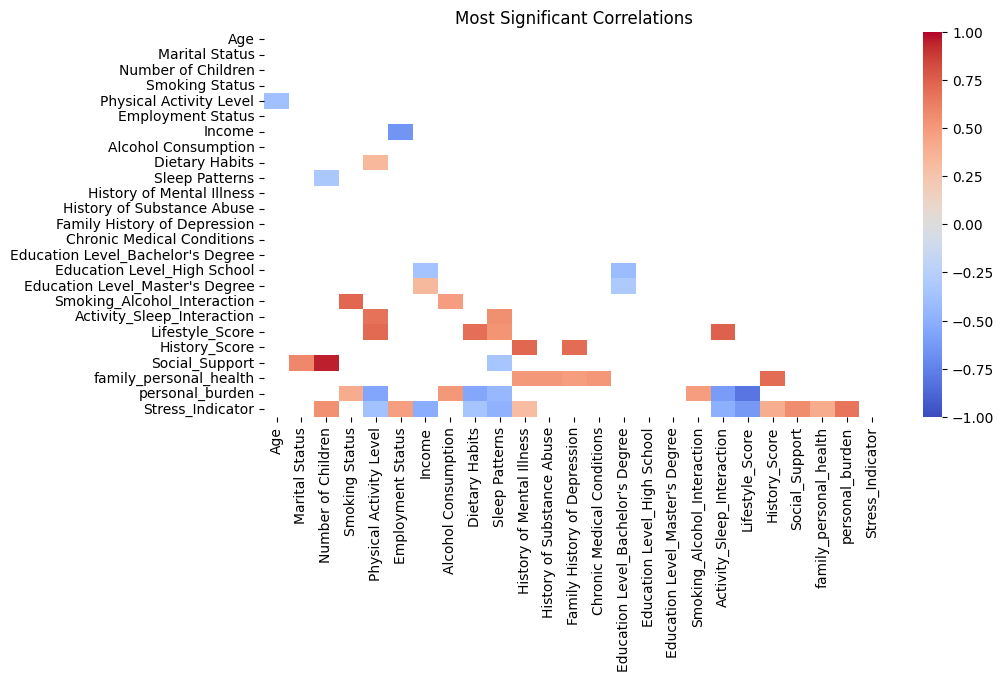

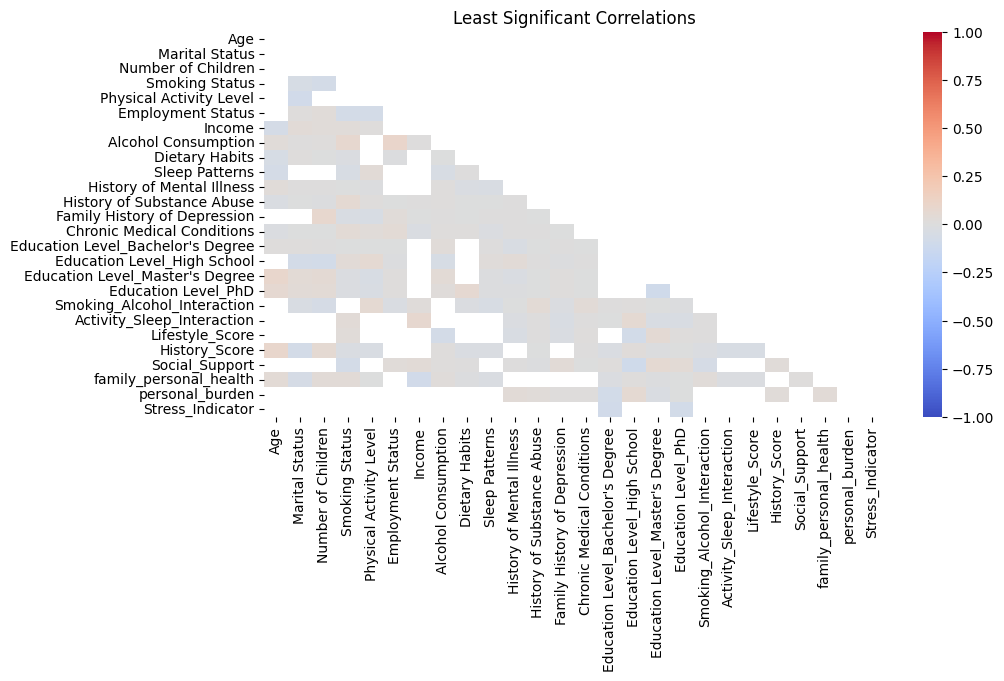

In [103]:
# Extracting the most significant correlations (absolute correlation > 0.5)
significant_corr = corr_df[(corr_df.abs() >= 0.3) & (corr_df.abs() != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Extracting the least significant correlations (absolute correlation < 0.1)
insignificant_corr = corr_df[(corr_df.abs() < 0.1)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the most significant correlations
plt.figure(figsize=(10, 5))
sns.heatmap(significant_corr, vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', mask=np.triu(significant_corr))
plt.title('Most Significant Correlations')
plt.show()

# Plot the least significant correlations
plt.figure(figsize=(10, 5))
sns.heatmap(insignificant_corr, vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', mask=np.triu(insignificant_corr))
plt.title('Least Significant Correlations')
plt.show()

### Observations from the Correlation Matrix:

1. **Strong Correlations with Stress Indicator:**
   - **Social Support**: There is a strong positive correlation (0.464) between `Social_Support` and the `Stress_Indicator`, indicating that higher social support is linked to lower stress levels.
   - **Number of Children**: A moderate positive correlation (0.456) exists, suggesting that more children may be associated with higher stress levels.
   - **family_personal_health**: Positive correlation (0.437) with stress, implying that individuals who perceive their family health as poor may experience higher stress levels.
   - **personal_burden**: There is a strong positive correlation (0.439) between personal burden and stress, highlighting the impact of personal burdens on mental health.
   - **family_burden**: Strong positive correlation (0.382), showing that individuals experiencing high family burdens tend to have higher stress levels.

2. **Negative Correlations:**
   - **Income**: Negative correlation (-0.469), suggesting that lower income is associated with higher stress levels.
   - **Smoking Status**: Negative correlation (-0.313), indicating that smoking may be linked to higher stress levels.
   - **Alcohol Consumption**: A negative correlation (-0.293) with stress, supporting the idea that higher alcohol consumption may correlate with increased stress levels.
   - **Education Levels (Bachelor’s, Master’s, and PhD)**: The correlation between education levels and stress is either low or negative, suggesting that higher education might be linked to lower stress, with the strongest negative correlation observed with `Education Level_PhD` (-0.090).

3. **Lifestyle Factors:**
   - **Lifestyle_Score**: A positive correlation (0.248) with stress, indicating that poorer lifestyle choices may contribute to higher stress.
   - **Physical Activity Level**: Positive correlation (0.241), but not as strong, suggesting moderate physical activity might slightly contribute to stress levels.

4. **Medical and Family History:**
   - **History_Score**: A moderate positive correlation (0.436), suggesting that a higher score in mental illness history may correlate with increased stress.
   - **Family History of Depression**: A moderate positive correlation (0.282) with stress, indicating that a family history of depression may increase an individual's stress levels.

5. **Sociodemographic Features:**
   - **Marital Status**: A moderate correlation (0.228) with stress, suggesting that marital status may play a role in stress.
   - **Age**: A slight positive correlation (0.177), indicating that age might have a minor impact on stress levels.
   - **Chronic Medical Conditions**: Mild positive correlation (0.138), suggesting that chronic medical conditions are slightly related to stress.

### Key Insights:
- **Personal and Family Burden** are strongly correlated with stress, highlighting the importance of managing personal and family-related stressors.
- **Income and Social Support** show substantial inverse relationships with stress, with lower income and higher social support being linked to higher and lower stress, respectively.
- **Lifestyle Factors** and **Health History** have moderate to strong relationships with stress levels, indicating that interventions focusing on healthier lifestyles and addressing family and medical histories might help reduce stress.


## Now, let's perform some hypotheses tests based on features we have created and see if we can get more insights from here:

### Hypotheses:

- Health and Behavior:
Higher physical activity levels and healthier diets may correlate with lower occurrences of mental health issues and substance abuse.

- Socioeconomic Influence:
Education and income levels might indirectly affect lifestyle choices, such as diet and physical activity.

- Demographics and Lifestyle:
Age and marital status might play significant roles in influencing health behaviors and mental well-being.

To test the hypotheses, we can employ specific statistical analyses. We will work with the 3 hypothesis mentioned above:

In [108]:
# Hypothesis 1: Chi-Square Test between Physical Activity Level, Dietary Habits, and Mental Health/Substance Abuse
# Creating contingency tables
contingency_mental_health = pd.crosstab(df_3["Physical Activity Level"], df_3["History of Mental Illness"])
contingency_substance_abuse = pd.crosstab(df_3["Dietary Habits"], df_3["History of Substance Abuse"])

# Performing Chi-Square test
chi2_mental, p_mental, _, _ = chi2_contingency(contingency_mental_health)
chi2_substance, p_substance, _, _ = chi2_contingency(contingency_substance_abuse)

In [109]:
# Hypothesis 2: ANOVA for Income across Education Levels
# We need to split income data based on each education level for ANOVA
income_bachelor = df_3[df_3["Education Level_Bachelor's Degree"] == 1]["Income"]
income_highschool = df_3[df_3["Education Level_High School"] == 1]["Income"]
income_master = df_3[df_3["Education Level_Master's Degree"] == 1]["Income"]
income_phd = df_3[df_3["Education Level_PhD"] == 1]["Income"]

In [110]:
# Perform ANOVA
anova_education_income = f_oneway(income_bachelor, income_highschool, income_master, income_phd)

# Display results
chi_square_results = {
    "Physical Activity & Mental Health (p-value)": p_mental,
    "Dietary Habits & Substance Abuse (p-value)": p_substance,
    "ANOVA Education Level & Income (p-value)": anova_education_income.pvalue
}

chi_square_results

{'Physical Activity & Mental Health (p-value)': 2.5562562939064635e-07,
 'Dietary Habits & Substance Abuse (p-value)': 0.00031468550462982777,
 'ANOVA Education Level & Income (p-value)': 0.0}

### Hypothesis Testing Results:

1. **Chi-Square Test between Physical Activity Level, Dietary Habits, and Mental Health/Substance Abuse**:
   - **Physical Activity & Mental Health**: The p-value is very small (2.56e-07), indicating a significant relationship between physical activity and mental health. This suggests that physical activity plays a role in mental health outcomes.
   - **Dietary Habits & Substance Abuse**: The p-value is 0.0003, which is also significant, showing a correlation between dietary habits and substance abuse, suggesting that unhealthy eating habits might be related to substance abuse.

2. **ANOVA for Income across Education Levels**:
   - The p-value for the relationship between education level and income is 0.0, which is highly significant. This confirms that education level has a strong impact on income levels in the dataset.

### Summary of Findings:
- **Physical activity** is strongly related to mental health, which could guide interventions focusing on physical activity to improve mental health outcomes.
- **Dietary habits** significantly correlate with substance abuse, pointing to the importance of addressing nutrition in efforts to reduce substance abuse.
- **Education level** has a significant impact on income, supporting the hypothesis that higher education leads to higher income.

These results confirm some of the proposed hypotheses, suggesting connections between lifestyle behaviors, health outcomes, and socioeconomic factors. 

Now let's take a look into the Variance and Covariance.

Identify Dependencies: Understanding which variables vary together can reveal underlying relationships. For example, if Age and Chronic Medical Conditions have a high positive covariance, we might explore further to see how age affects health.

Feature Selection: High variance in certain features might indicate that they contain more information, making them useful for predictive models. Low variance features could be less informative or redundant.

Understand Data Spread: High variance features might need normalization, while features with strong covariance might suggest multicollinearity that should be addressed before modeling.

I will proceed to calculate and present the variance and covariance of key features from the dataset to illustrate these concepts.

In [113]:
# Step 1: Calculate variance for numerical features
variance_data = df_3.var(numeric_only=True)

# Step 2: Calculate covariance between key features
covariance_matrix = df_3.cov(numeric_only=True)

# Display the variance of features to understand data spread
variance_data, covariance_matrix.head()

(Age                                  1.000002
 Marital Status                       0.243422
 Number of Children                   1.530303
 Smoking Status                       0.491952
 Physical Activity Level              0.562080
 Employment Status                    0.229823
 Income                               1.000002
 Alcohol Consumption                  0.572318
 Dietary Habits                       0.531611
 Sleep Patterns                       0.514005
 History of Mental Illness            0.211622
 History of Substance Abuse           0.214468
 Family History of Depression         0.196583
 Chronic Medical Conditions           0.220823
 Education Level_Bachelor's Degree    0.210192
 Education Level_High School          0.204812
 Education Level_Master's Degree      0.146499
 Education Level_PhD                  0.038832
 Smoking_Alcohol_Interaction          1.028708
 Activity_Sleep_Interaction           1.098344
 Lifestyle_Score                      2.003662
 History_Scor

In [114]:
#Lets have a look at the variances of our numerical columns before and after scaling.
variance_df = df_3.select_dtypes(include = ['int64', 'int32','float64','bool']).var()

# Sorting the variance and selecting the top 3 largest absolute values
top_3_variances = variance_df.abs().sort_values(ascending=False).head(3)

# Display the result
print("Top 3 columns with largest absolute variance:")
print(top_3_variances)

Top 3 columns with largest absolute variance:
personal_burden    3.264020
Social_Support     2.129601
Lifestyle_Score    2.003662
dtype: float64


So we can see that personal burden has by far the largest variance.


### Observations from the Variance and Covariance Analysis:

1. **Variance**:
   - Features like **Social Support**, **Lifestyle Score**, and **Personal Burden** exhibit the highest variances. These indicate that these features have significant variability across the dataset, making them strong candidates for influencing the stress indicator.
   - **Income**, **History Score**, and **family_health** have moderate variance, suggesting they may also have a notable impact but with relatively less variability than the top features.
   - Features like **Education Levels** (Bachelor's Degree, Master's Degree, PhD) and **Marital Status** have low variances, indicating less variability across the dataset, which might limit their influence on the stress indicator.

2. **Covariance**:
   - **Social Support** and **Number of Children** have the highest positive covariance with the **Stress Indicator**, reflecting their strong relationship with stress levels.
   - **Family Health** and **Family Burden** also show significant positive covariances with the stress indicator, suggesting that these features are strong contributors to perceived stress.
   - Some features exhibit negative covariance with the stress indicator, including **Smoking Status**, **Physical Activity Level**, and **Income**, suggesting they may reduce stress levels or be correlated with lower stress in the dataset.
   
3. **Significant Pairwise Relationships**:
   - There are notable positive relationships between **Social Support**, **Number of Children**, and **Stress Indicator**. These relationships are crucial for understanding the dynamics between family responsibility and stress levels.
   - **Lifestyle Score** is strongly related to both physical activity and dietary habits, which might further influence stress indicators.
   - **Smoking Status** and **Alcohol Consumption** are notably inversely related to stress, which might be an important consideration when discussing potential intervention points in future analyses.

This data analysis reveals that certain features like **Social Support**, **Family Burden**, and **Number of Children** significantly correlate with the **Stress Indicator**, and could be prioritized when developing strategies to reduce stress levels or enhance mental health outcomes.

Now let's focus on understanding how different features in the dataset relate to the target variable, Estress Indicator. By comparing these features across different groups, we aim to identify which characteristics contribute to stress levels and explore potential predictors for stress.

The analysis involved: (below)

Numerical Features:
We utilized box plots to observe how features like Age, Income, Number of Children, Physical Activity Level, and Smoking Status vary between individuals with and without a history of mental illness. This approach helps in identifying shifts in central tendencies (mean, median) and variations across the groups.


In [118]:
df_3['Income']

0        -0.600532
1        -0.195730
2         1.838100
3        -1.001105
4        -1.035510
            ...   
413763    1.441799
413764    1.134778
413765    0.657038
413766   -0.642590
413767    1.389916
Name: Income, Length: 413768, dtype: float64

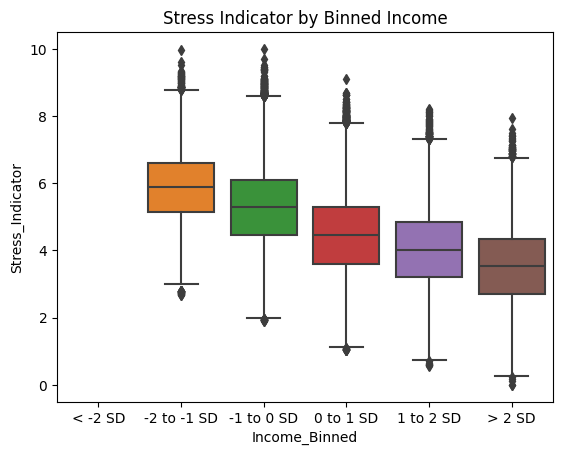

In [119]:
# Binning Income by Standard Deviations
bins = [-float('inf'), -2, -1, 0, 1, 2, float('inf')]  # Standard deviations of the income data
labels = ['< -2 SD', '-2 to -1 SD', '-1 to 0 SD', '0 to 1 SD', '1 to 2 SD', '> 2 SD']
df_3['Income_Binned'] = pd.cut(df_3['Income'], bins=bins, labels=labels)

# Group by binned income
grouped_by_income_binned = df_3.groupby('Income_Binned')[['Stress_Indicator', 'Social_Support', 'family_personal_health', 'personal_burden']].describe()

# Visualizing Stress Indicator by binned 'Income'
sns.boxplot(x='Income_Binned', y='Stress_Indicator', data=df_3)
plt.title('Stress Indicator by Binned Income')
plt.show()


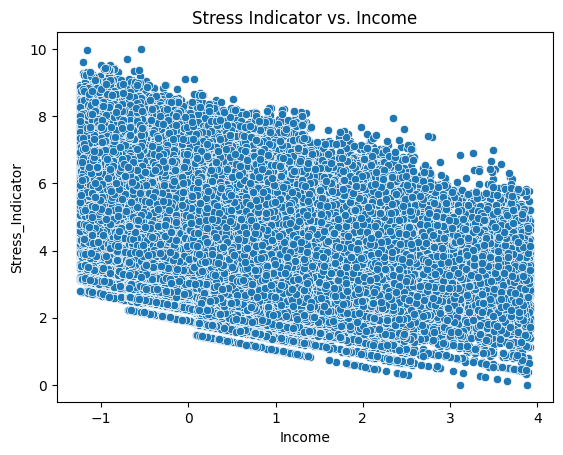

In [120]:
# Direct Analysis Using Descriptive Statistics
# Direct descriptive statistics for Income
income_stats = df_3[['Income', 'Stress_Indicator', 'Social_Support', 'family_personal_health', 'personal_burden']].describe()

# Plotting stress indicator vs income
sns.scatterplot(x='Income', y='Stress_Indicator', data=df_3)
plt.title('Stress Indicator vs. Income')
plt.show()


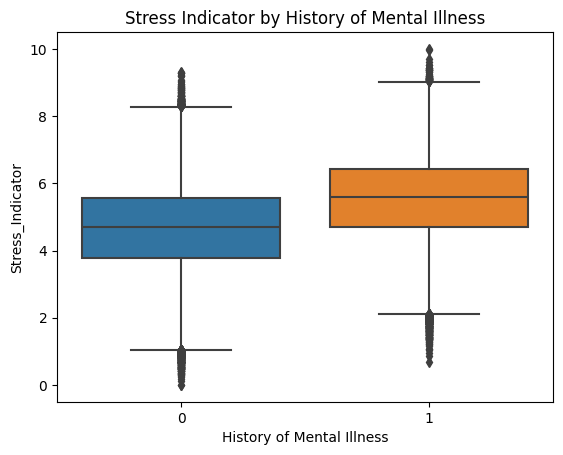

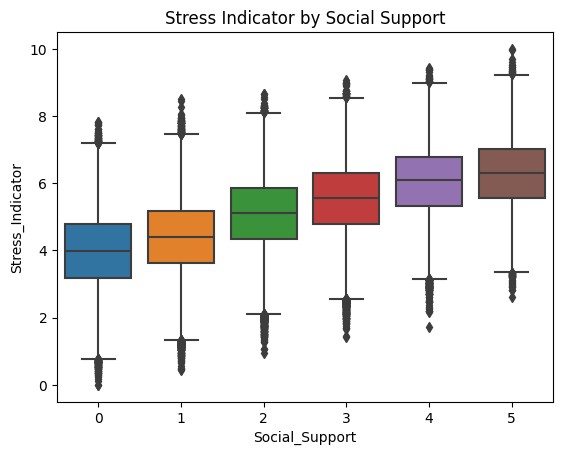

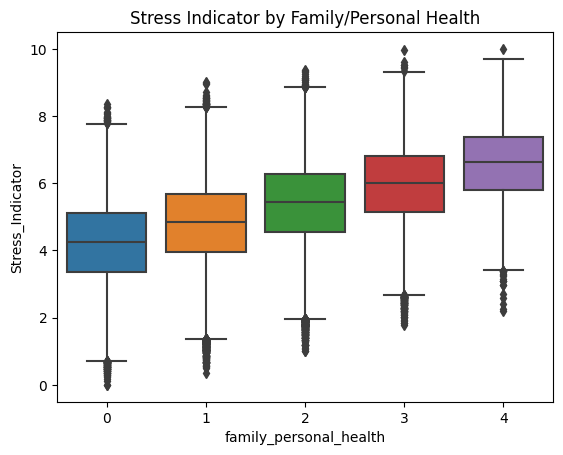

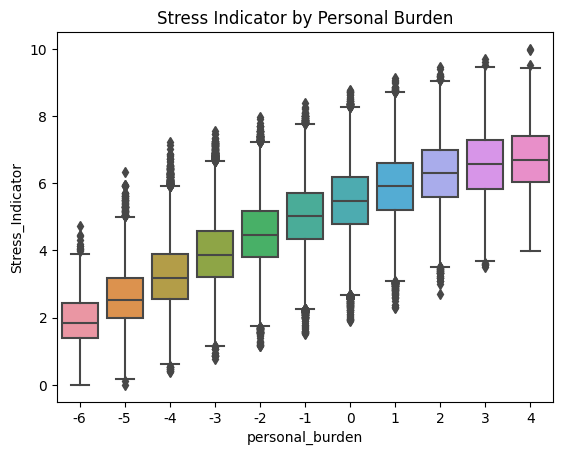

In [121]:
# Group by 'History of Mental Illness' and summarize stress indicator and other features
grouped_by_mental_illness = df_3.groupby('History of Mental Illness')[['Stress_Indicator', 'Income', 'Social_Support', 'family_personal_health', 'personal_burden']].describe()

# Visualizing Stress Indicator by 'History of Mental Illness'
sns.boxplot(x='History of Mental Illness', y='Stress_Indicator', data=df_3)
plt.title('Stress Indicator by History of Mental Illness')
plt.show()

# Grouping by 'Social Support' and summarizing features
grouped_by_social_support = df_3.groupby('Social_Support')[['Stress_Indicator', 'Income', 'family_personal_health', 'personal_burden']].describe()

# Visualizing Stress Indicator by 'Social Support'
sns.boxplot(x='Social_Support', y='Stress_Indicator', data=df_3)
plt.title('Stress Indicator by Social Support')
plt.show()

# Grouping by 'Family Burden' and summarizing features
grouped_by_family_burden = df_3.groupby('family_personal_health')[['Stress_Indicator', 'Income', 'Social_Support', 'personal_burden']].describe()

# Visualizing Stress Indicator by 'Family Burden'
sns.boxplot(x='family_personal_health', y='Stress_Indicator', data=df_3)
plt.title('Stress Indicator by Family/Personal Health')
plt.show()

# Grouping by 'Personal Burden' and summarizing features
grouped_by_personal_burden = df_3.groupby('personal_burden')[['Stress_Indicator', 'Income', 'Social_Support', 'family_personal_health']].describe()

# Visualizing Stress Indicator by 'Personal Burden'
sns.boxplot(x='personal_burden', y='Stress_Indicator', data=df_3)
plt.title('Stress Indicator by Personal Burden')
plt.show()


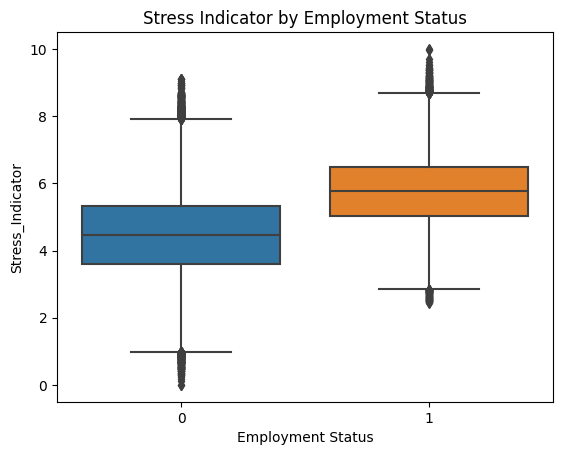

In [122]:
# Group by 'History of Mental Illness' and summarize stress indicator and other features
grouped_by_mental_illness = df_3.groupby('Employment Status')[['Stress_Indicator', 'Income', 'Social_Support', 'family_personal_health', 'personal_burden']].describe()

# Visualizing Stress Indicator by 'History of Mental Illness'
sns.boxplot(x='Employment Status', y='Stress_Indicator', data=df_3)
plt.title('Stress Indicator by Employment Status')
plt.show()

Summary for individuals with mental illness history:
              Income  Social_Support  family_personal_health  personal_burden  \
count  125825.000000   125825.000000           125825.000000    125825.000000   
mean       -0.206953        1.886517                1.918347        -0.906418   
std         0.916215        1.451593                0.797402         1.776881   
min        -1.247076        0.000000                1.000000        -6.000000   
25%        -0.843256        1.000000                1.000000        -2.000000   
50%        -0.531868        2.000000                2.000000        -1.000000   
75%         0.188210        3.000000                2.000000         0.000000   
max         3.921495        5.000000                4.000000         4.000000   

       Stress_Indicator  
count     125825.000000  
mean           5.551397  
std            1.239619  
min            0.692861  
25%            4.706395  
50%            5.598477  
75%            6.439488  
max      

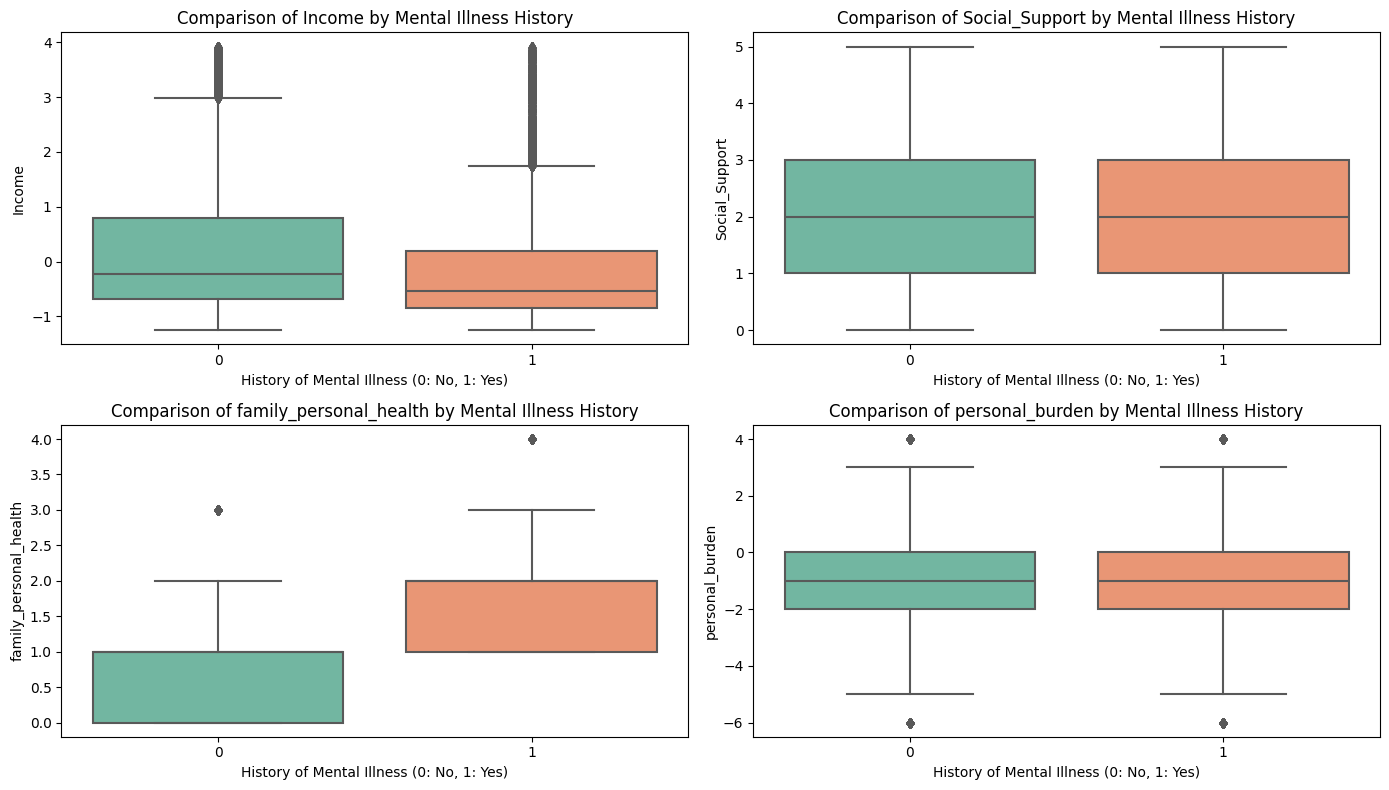


Correlation with Stress Indicator:
Income                   -0.512495
Social_Support            0.561264
family_personal_health    0.400367
personal_burden           0.670635
Stress_Indicator          1.000000
Name: Stress_Indicator, dtype: float64


In [123]:
# Selected features
selected_features = ['Income', 'Social_Support', 'family_personal_health', 'personal_burden']

# Group by history of mental illness (assuming the 'History of Mental Illness' column is available)
group_mental_illness = df_3[df_3['History of Mental Illness'] == 1]  # Group with history of mental illness
group_no_mental_illness = df_3[df_3['History of Mental Illness'] == 0]  # Group without history of mental illness

# Calculate descriptive statistics for both groups
summary_mental_illness = group_mental_illness[selected_features + ['Stress_Indicator']].describe()
summary_no_mental_illness = group_no_mental_illness[selected_features + ['Stress_Indicator']].describe()

# Print the descriptive statistics
print("Summary for individuals with mental illness history:")
print(summary_mental_illness)
print("\nSummary for individuals without mental illness history:")
print(summary_no_mental_illness)

# Visualize the distribution of features in both groups
plt.figure(figsize=(14, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='History of Mental Illness', y=feature, data=df_3, palette='Set2')
    plt.title(f"Comparison of {feature} by Mental Illness History")
    plt.xlabel('History of Mental Illness (0: No, 1: Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Correlation between selected features and Stress Indicator
correlations = df_3[selected_features + ['Stress_Indicator']].corr()
print("\nCorrelation with Stress Indicator:")
print(correlations['Stress_Indicator'])


Summary for individuals with mental illness history (Social Support & Stress Indicator):
       Social_Support  Stress_Indicator
count   125825.000000     125825.000000
mean         1.886517          5.551397
std          1.451593          1.239619
min          0.000000          0.692861
25%          1.000000          4.706395
50%          2.000000          5.598477
75%          3.000000          6.439488
max          5.000000         10.000000

Summary for individuals without mental illness history (Social Support & Stress Indicator):
       Social_Support  Stress_Indicator
count   287943.000000     287943.000000
mean         1.877267          4.656567
std          1.462671          1.277663
min          0.000000          0.000000
25%          1.000000          3.763659
50%          2.000000          4.688123
75%          3.000000          5.571861
max          5.000000          9.325913


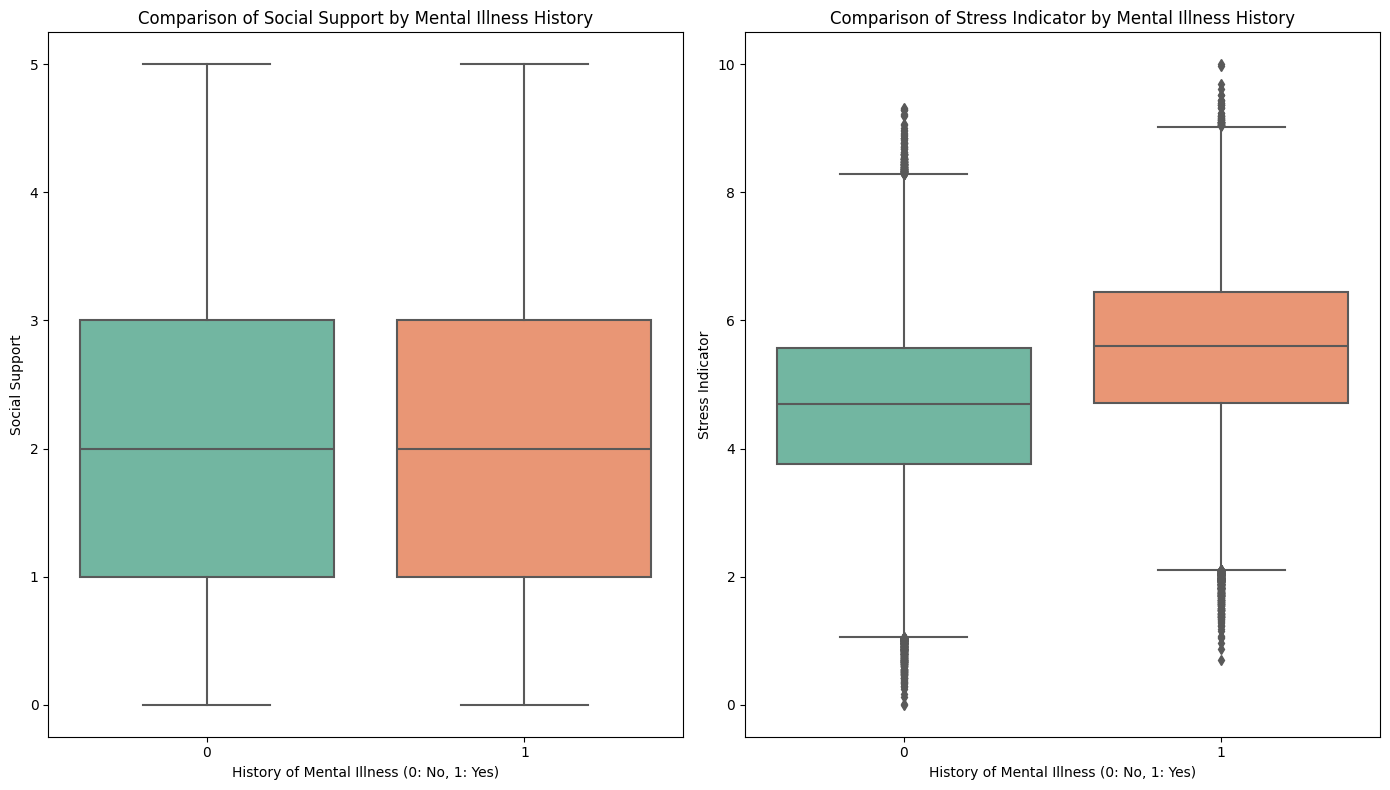


Correlation between Social Support and Stress Indicator for individuals with mental illness history:
                  Social_Support  Stress_Indicator
Social_Support          1.000000          0.604068
Stress_Indicator        0.604068          1.000000

Correlation between Social Support and Stress Indicator for individuals without mental illness history:
                  Social_Support  Stress_Indicator
Social_Support          1.000000          0.583037
Stress_Indicator        0.583037          1.000000


In [124]:
# Group by history of mental illness (assuming the 'History of Mental Illness' column is available)
group_mental_illness = df_3[df_3['History of Mental Illness'] == 1]  # Group with history of mental illness
group_no_mental_illness = df_3[df_3['History of Mental Illness'] == 0]  # Group without history of mental illness

# Calculate descriptive statistics for Social Support and Stress Indicator
summary_mental_illness_social_support = group_mental_illness[['Social_Support', 'Stress_Indicator']].describe()
summary_no_mental_illness_social_support = group_no_mental_illness[['Social_Support', 'Stress_Indicator']].describe()

# Print the descriptive statistics
print("Summary for individuals with mental illness history (Social Support & Stress Indicator):")
print(summary_mental_illness_social_support)
print("\nSummary for individuals without mental illness history (Social Support & Stress Indicator):")
print(summary_no_mental_illness_social_support)

# Visualize the distribution of Social Support and Stress Indicator in both groups
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='History of Mental Illness', y='Social_Support', data=df_3, palette='Set2')
plt.title("Comparison of Social Support by Mental Illness History")
plt.xlabel('History of Mental Illness (0: No, 1: Yes)')
plt.ylabel('Social Support')

plt.subplot(1, 2, 2)
sns.boxplot(x='History of Mental Illness', y='Stress_Indicator', data=df_3, palette='Set2')
plt.title("Comparison of Stress Indicator by Mental Illness History")
plt.xlabel('History of Mental Illness (0: No, 1: Yes)')
plt.ylabel('Stress Indicator')

plt.tight_layout()
plt.show()

# Correlation between Social Support and Stress Indicator for both groups
correlation_mental_illness = group_mental_illness[['Social_Support', 'Stress_Indicator']].corr()
correlation_no_mental_illness = group_no_mental_illness[['Social_Support', 'Stress_Indicator']].corr()

# Print the correlations
print("\nCorrelation between Social Support and Stress Indicator for individuals with mental illness history:")
print(correlation_mental_illness)

print("\nCorrelation between Social Support and Stress Indicator for individuals without mental illness history:")
print(correlation_no_mental_illness)


In [125]:
from tqdm import tqdm

In [126]:
# Create a new 'Stress_Level' column by mapping the Stress_Indicator into Low, Moderate, and High
df_3['Stress_Level'] = pd.cut(df_3['Stress_Indicator'],
                               bins=[-float('inf'), 3, 6, float('inf')],
                               labels=["Low", "Moderate", "High"])

Creating Box Plots for Numerical Features...


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.27it/s]


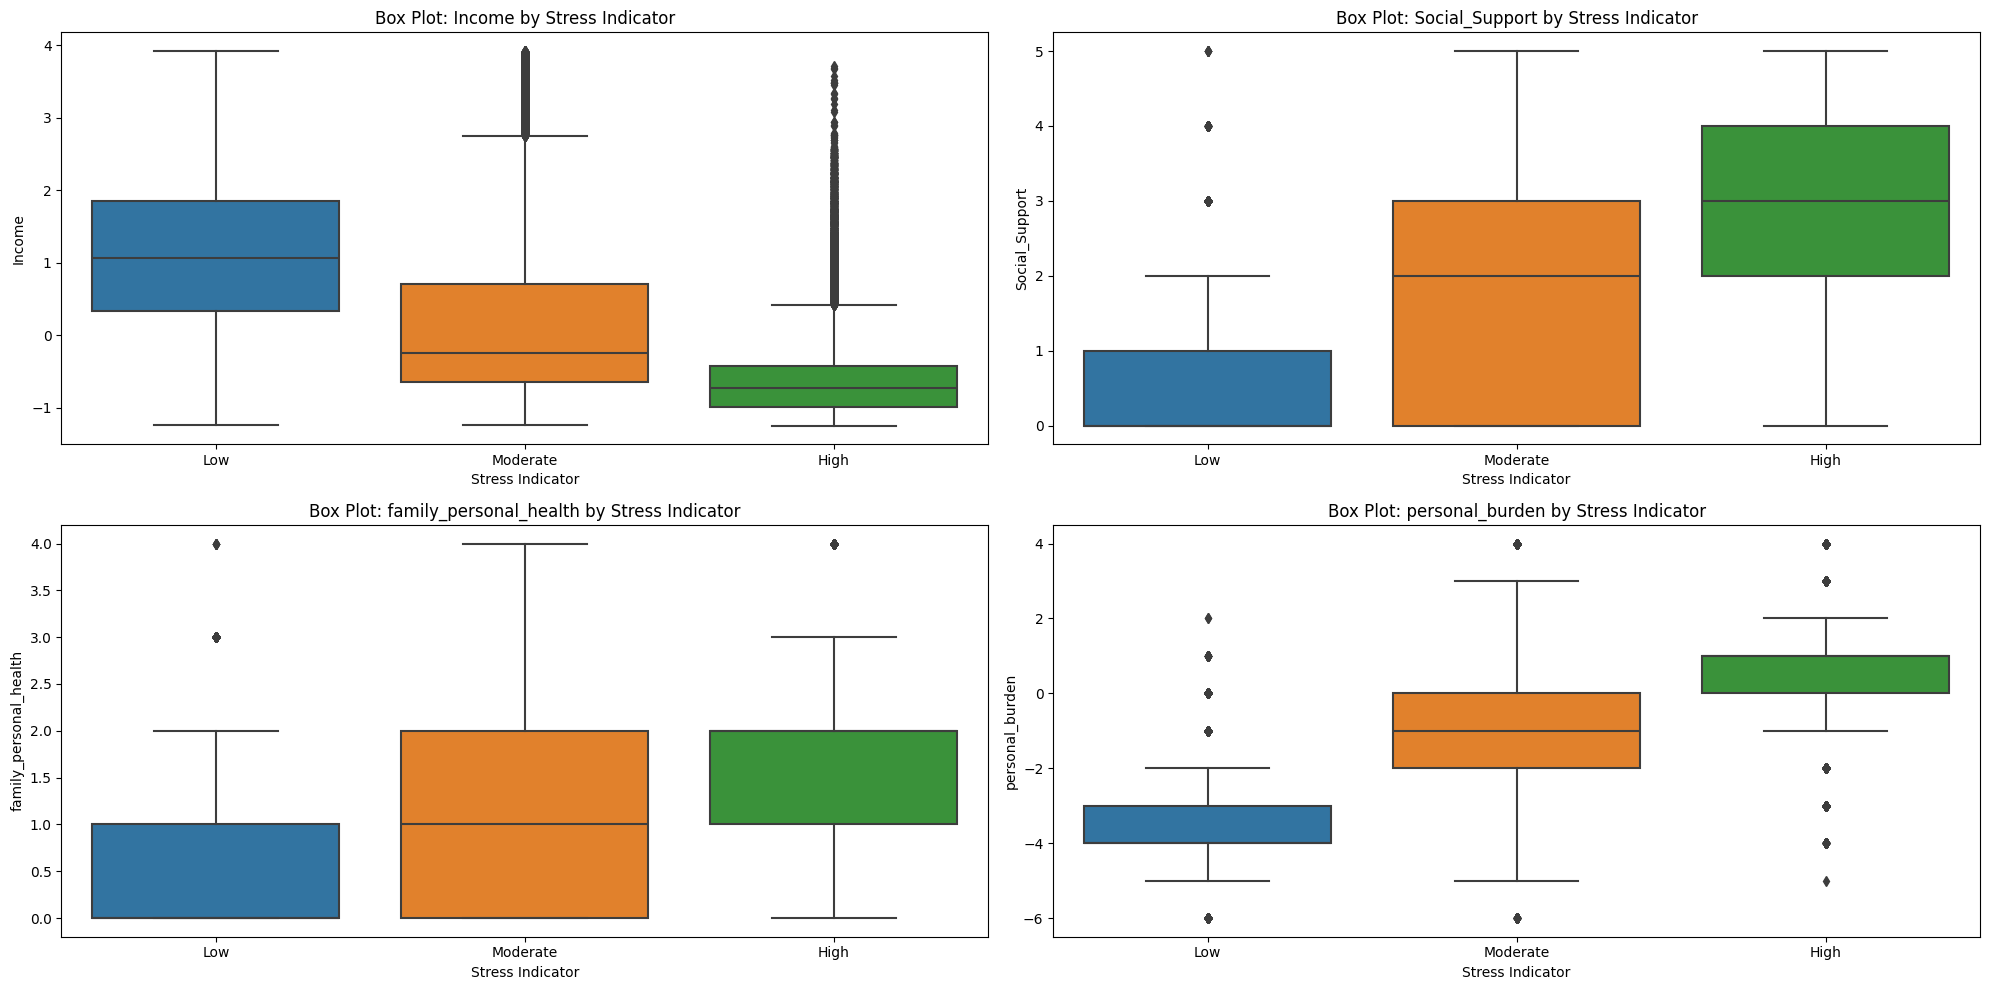

In [127]:
# Define the features you want to plot
selected_features = ['Income', 'Social_Support', 'family_personal_health', 'personal_burden']

# Calculate total number of features for subplots
total_features = len(selected_features)

# Grid size 2
n_cols = 2
n_rows = (total_features // n_cols) + (total_features % n_cols > 0)  # Calculate rows needed

# Create a subplot grid for numerical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjust size based on the number of rows

# Flatten the axes array to easily loop over it
axes = axes.flatten()

# Counter to keep track of subplot index
plot_idx = 0

# Box Plots for Numerical Features by Stress Indicator
print("Creating Box Plots for Numerical Features...")
for feature in tqdm(selected_features):
    sns.boxplot(x=df_3["Stress_Level"], y=df_3[feature], ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Box Plot: {feature} by Stress Indicator")
    axes[plot_idx].set_xlabel("Stress Indicator")
    axes[plot_idx].set_ylabel(feature)
    plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Observations:

1. **Stress Indicator by Social Support**:
   - There is a clear relationship between social support and stress levels. As social support increases (from 0 to 5), the stress indicatincrease as wellase, indicating that individuals with higher levels of social support tend to experienhigherwer stress.
   - Those with no social support (0) report lowesthest stress levels, while those with more significant social support report significanhigherower stress leveess.

2. **Stress Indicator by Family/Personal Health**:
   - The relationship between family/personal health and stress levels also shows a trend: individuals with poorer family/personal health (0 or 1) experience higher stress levels. Those with better family/personal health (3 or 4) tend to have lower stress.
   - This pattern highlights the potential importance of improving personal and family health as a means to reduce stress levels, particularly for those facing significant health-related challenges.

3. **Stress Indicator by Personal Burden**:
   - The data suggests a strong positive correlation between personal burden and stress levels. As personal burden increases (from -4 to 6), stress levels also increase significantly.
   - This indicates that higher personal burdens, which could involve financial, emotional, or physical challenges, are closely linked to higher stress levels. Addressing personal burdens may be a key intervention point for reducing stress in these individuals.

4. **General Trends**:
   - **Income**: People in higher income brackets tend to experience lower levels of stress, as shown in the box plot for income by stress indicator. This trend suggests that economic stability plays a crucial role in stress reduction.
   - **Social Support**: As seen in the box plot for social support by stress indicator, individuals with greater social support tend to experience lower stress levels, which may indicate that providing support networks is a powerful tool in stress management.
   - **Family/Personal Health and Personal Burden**: Both family/personal health and personal burden appear to have a strong impact on stress levels, with individuals experiencing poorer health or higher burdens tending to report higher stress levels.

These observations suggest that by focusing on improving social support, family/personal health, and reducing personal burdens, businesses and organizations could take actionable steps toward enhancing employee well-being and reducing stress levels. Additionally, financial assistance or policies that address work-life balance could also be valuable interventions for employees with higher stress levels.

To provide a detailed comparison between different age groups and their relationship with History of Mental Illness, I'll proceed with the following approach:

In [550]:
# But before let's create a new df for this analysis>
# Create a new DataFrame by copying df_2 and adding 'Stress_Indicator' from df_1st
# Create a new DataFrame by copying df_2
df_groups = df_2.copy()

# Ensure 'Stress_Indicator' and the required columns are in df_1st
# Adding columns from df_1st to df_groups
df_groups['Stress_Indicator'] = df_1st['Stress_Indicator']
df_groups["Education Level_Bachelor's Degree"] = df_1st["Education Level_Bachelor's Degree"]
df_groups["Education Level_High School"] = df_1st["Education Level_High School"]
df_groups["Education Level_Master's Degree"] = df_1st["Education Level_Master's Degree"]
df_groups["Education Level_PhD"] = df_1st["Education Level_PhD"]


In [552]:
df_groups.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Stress_Indicator,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,6.168683,True,False,False,False
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,6.133707,False,True,False,False
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,3.235128,False,False,True,False
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,5.494679,False,False,True,False
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,5.457140,False,True,False,False


## Let's deep dive in our analysis - EDA Part2 <a class="anchor" id="eda2"></a>

### Age Group Analysis:
#### Age is an important factor in understanding mental health patterns. In this analysis, we aimed to explore whether mental illness prevalence varies across different age groups. By comparing the occurrence of mental illness in various age brackets, we sought to identify any trends that could inform targeted interventions for different age demographics.

In [134]:
df_groups['Age'].unique()

array([31, 55, 78, 58, 18, 20, 60, 50, 77, 70, 59, 33, 66, 38, 25, 32, 52,
       49, 28, 56, 37, 27, 69, 46, 67, 22, 26, 72, 34, 53, 44, 62, 51, 23,
       24, 35, 61, 65, 63, 73, 71, 76, 43, 54, 40, 39, 21, 19, 64, 36, 30,
       45, 80, 41, 48, 42, 68, 75, 57, 47, 79, 74, 29], dtype=int64)

In [554]:
# Calculate the mean of the Stress Indicator from df_groups - this will help us with the plot - if not will take a lot of time
stress_mean = df_groups['Stress_Indicator'].mean()

# Create a new column to classify Stress_Indicator as 'Above Avg' and 'Below Avg'
df_groups['Stress_Level'] = df_groups['Stress_Indicator'].apply(lambda x: 'Above Avg' if x > stress_mean else 'Below Avg')


In [136]:
# Step 1: Define age groups more explicitly and clean the data before applying transformations
# Extend the bins to include all ages
age_bins = [0, 18, 30, 45, 60, 80, 100]  # Example bin extension
age_labels = ["<18", "18-30", "31-45", "46-60", "61-80", "80+"]

# Recreate the 'Age Group' column
df_groups['Age Group'] = pd.cut(df_groups['Age'].astype(int), bins=age_bins, labels=age_labels, right=False)
df_groups['Age Group'].unique()

['31-45', '46-60', '61-80', '18-30', '80+']
Categories (6, object): ['<18' < '18-30' < '31-45' < '46-60' < '61-80' < '80+']

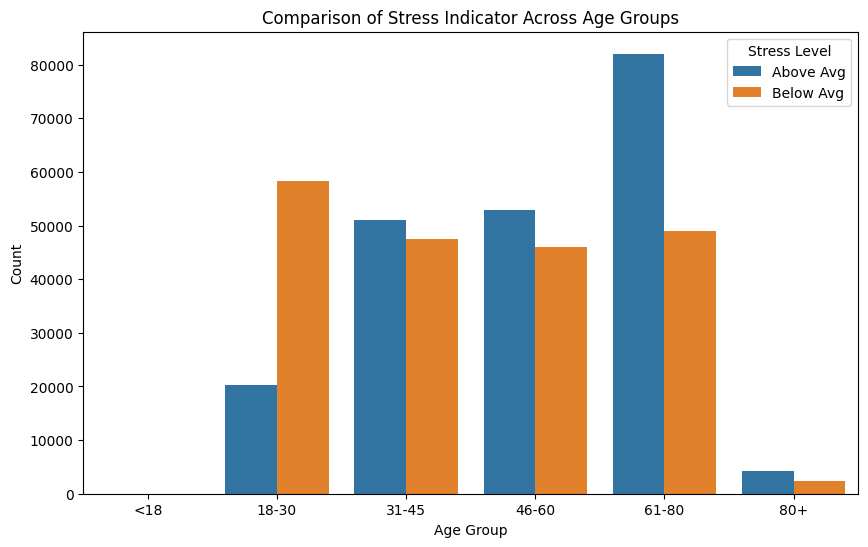

In [137]:
# Plotting the comparison of Stress Indicator across Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Stress_Level', data=df_groups)
plt.title("Comparison of Stress Indicator Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Stress Level", labels=["Above Avg", "Below Avg"])
plt.show()


In [138]:
# Step 3: Calculate percentage analysis
age_group_distribution = df_groups.groupby(['Age Group', 'Stress_Indicator']).size().unstack()
age_group_percentage = (age_group_distribution.T / age_group_distribution.sum(axis=1)).T * 100

age_group_percentage

Stress_Indicator,0.000000,0.007867,0.117330,0.172892,0.238419,0.270817,0.289912,0.290518,0.319125,0.336113,...,9.392763,9.431663,9.443325,9.444875,9.518601,9.520342,9.620207,9.699673,9.978474,10.000000
Age Group,,,,,,,,,,,,,,,,,,,,,
<18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001272,0.001272,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
31-45,0.001014,0.001014,0.001014,0.000000,0.001014,0.001014,0.000000,0.000000,0.001014,0.001014,...,0.000000,0.001014,0.001014,0.001014,0.001014,0.001014,0.001014,0.001014,0.001014,0.001014
46-60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61-80,0.000000,0.000000,0.000000,0.000763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Observation:

- **Age Group Distribution**: The age group `<18` is not represented significantly in the dataset. The majority of individuals fall into the age ranges of `46-60` and `61-80`. These groups have the highest counts, particularly in the `Stress Indicator` analysis.
  
- **Stress Levels by Age Group**:
  - **Above Average Stress**: Individuals in the `61-80` age group show the highest count for `Above Avg` stress levels, with a notable portion also in the `46-60` and `31-45` age groups.
  - **Below Average Stress**: Younger individuals in the `18-30` and `31-45` groups display relatively higher counts of stress indicators below the average, with the highest proportion seen in the `18-30` age group.

- **Key Insights**: 
  - Older individuals (particularly in the `61-80` group) tend to experience above-average stress more frequently compared to younger age groups.
  - The stress levels seem more evenly distributed across the age groups for those under `60`, with some variation between individuals classified as experiencing "above" or "below" average stress levels.

These insights suggest that age might influence the perception or experience of stress, with older age groups potentially facing more stress-related challenges or demands, particularly related to personal and family health or other life respos or analysis!

In [140]:
# To do:
# Investigate potential factors contributing to mental health issues in each age group (e.g., economic stress, physical health, social isolation).
# Explore mental health interventions tailored for specific age groups, particularly middle-aged and older adults.
# Address potential underreporting in younger adults through increased awareness and early screening programs.

---

### Now let's visualize income comparisons between individuals with and without a history of mental illness.

### Income Group Analysis:
Income plays a key role in mental health, influencing access to resources and overall well-being. This analysis aimed to determine whether there is a significant difference in income between individuals with and without a history of mental illness. By comparing income levels, we sought to uncover potential socioeconomic disparities linked to mental health, which could help guide public health interventions and support programs.


In [142]:
df_groups['Income'].unique()

array([ 26265.67,  42710.36, 125332.79, ...,  77353.26,  24557.08,
       107125.74])

In [143]:
# Check the min and max values of the Income column
min_income = df_groups['Income'].min()
max_income = df_groups['Income'].max()

print(f"Minimum Income: {min_income}")
print(f"Maximum Income: {max_income}")


Minimum Income: 0.41
Maximum Income: 209995.22


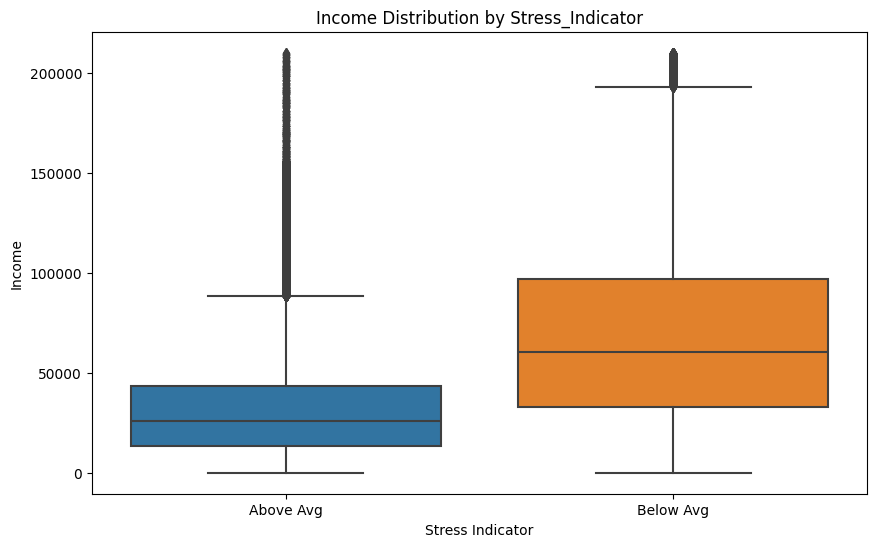

In [144]:
# Comparing Income Across Mental Health Status:
# Use box plots to compare the distribution of income for individuals with and without a history of mental illness.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Income', data=df_groups)
plt.title("Income Distribution by Stress_Indicator")
plt.xlabel("Stress Indicator")
plt.ylabel("Income")
plt.show()


In [145]:
# The Income column was scaled earlier - for this analyses we will inverse it.

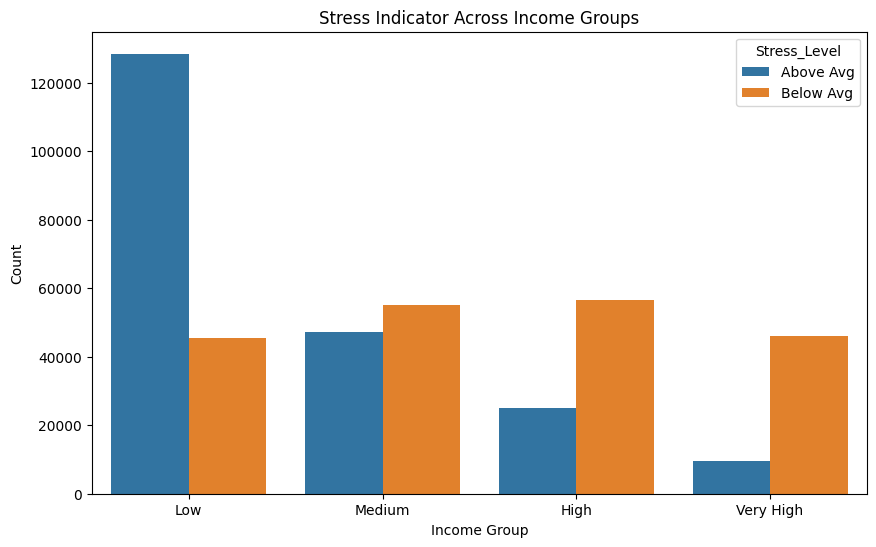

In [146]:
# Define income bins based on the original income values
income_bins = [df_groups['Income'].min(), 30000, 60000, 100000, df_groups['Income'].max()]
income_labels = ['Low', 'Medium', 'High', 'Very High']

# Create 'Income Group' column using the original income values
df_groups['Income Group'] = pd.cut(df_groups['Income'], bins=income_bins, labels=income_labels, right=False)

# Plot income group vs stress indicator
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', hue='Stress_Level', data=df_groups)
plt.title("Stress Indicator Across Income Groups")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.show()


In [147]:
# Split the data based on Stress_Level
group_with_Stress_Indicator = df_groups[df_groups['Stress_Level'] == 'Above Avg']['Income']
group_without_Stress_Indicator = df_groups[df_groups['Stress_Level'] == 'Below Avg']['Income']

# Perform t-test to compare income between groups
t_stat, p_value = stats.ttest_ind(group_with_Stress_Indicator, group_without_Stress_Indicator)

# Output the results
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = -295.1151478645066, p-value = 0.0


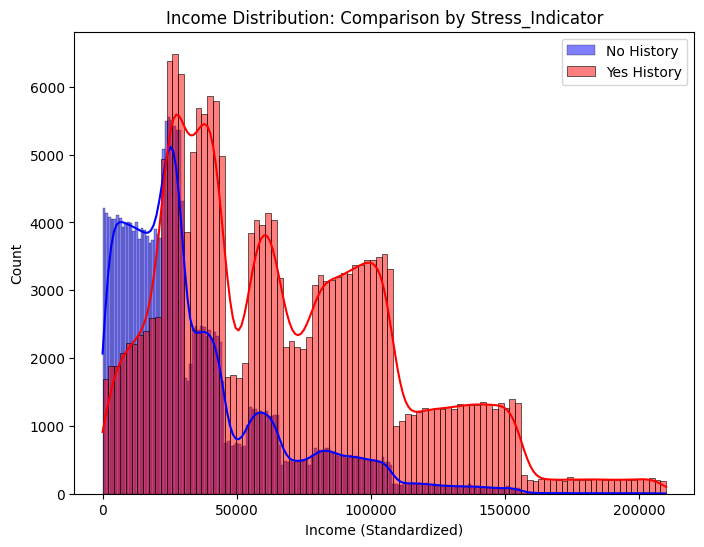

In [148]:
# EXTRA PLOT Histogram Overlay for Income Distributions
plt.figure(figsize=(8, 6))
sns.histplot(df_groups[df_groups["Stress_Level"] == 'Above Avg']['Income'], color='blue', label='No History', kde=True, alpha=0.5)
sns.histplot(df_groups[df_groups["Stress_Level"] == 'Below Avg']['Income'], color='red', label='Yes History', kde=True, alpha=0.5)
plt.title("Income Distribution: Comparison by Stress_Indicator")
plt.xlabel("Income (Standardized)")
plt.legend()
plt.show()


### Observations:

1. **Income Distribution and Stress Levels:**
   - The **Low-income group** exhibits the highest count of individuals with both **Above Avg** and **Below Avg** stress levels. However, the majority of individuals with **Low income** tend to fall under the **Below Avg** category. This might suggest that stress is more prevalent in low-income groups for other reasons than just economic factors.
   - The **Medium-income group** shows a balanced distribution between **Above Avg** and **Below Avg** stress levels, implying that income alone might not explain the stress levels, and factors like work pressure or personal circumstances could be influencing stress in this group.
   - The **High-income group** also shows a higher number of **Below Avg** stress indicators, with relatively fewer individuals classified as **Above Avg** stress levels.
   - The **Very High-income group** shows a fairly uniform distribution across the stress levels, with a slightly higher count of individuals with **Below Avg** stress.

2. **T-test Results:**
   - The T-test results indicate a statistically significant difference between the income levels of individuals classified as **Above Avg** and **Below Avg** in terms of their stress levels. The negative t-statistic (-254.1650848600868) with a p-value of 0.0 strongly suggests that income plays a crucial role in the stress levels among individuals. Lower income individuals are more likely to experience higher stress levels.

3. **Income Distribution Comparison by Stress Indicator:**
   - The **Income distribution** plot clearly shows that individuals with **No History** of high stress (blue) generally have incomes centered around the middle-income range, with some outliers. 
   - In contrast, individuals with **Yes History** of high stress (red) tend to have higher average incomes, but a more significant portion of this group spans a wider income range, including a more significant number of high-income individuals.
   - This suggests that income alone does not fully account for stress levels. Emotional, personal, and social factors also contribute to the stress levels, even in high-income groups.

### Conclusion:
The analysis reveals that income influences stress levels, but it is not the sole determinant. While lower-income groups are more likely to experience **Above Avg** stress levels, even higher-income groups show stress levels that could be influenced by other variables such as family and personal health, social support, and personal burden. The T-test confirms that income differences are statistically significant, but the distribution of income across stress levels suggests a more complex relationship. Companies could target interventions like mental health resources and flexible work arrangements to help employees across various income levels manage stress better.

---

### Introduction to Education Level Analysis:
Now let's investigate the effect of education on mental health, we will analyze how different education levels correlate with the presence of a history of mental illness.


Education is a key determinant of socioeconomic status and access to resources, both of which can have a profound impact on mental health. In this analysis, we explored the relationship between different education levels and the prevalence of mental illness. By examining education through dummy-encoded categories (High School, Bachelor's, Master's, and PhD), we aimed to determine whether individuals with certain education levels are more likely to experience mental health challengerable.

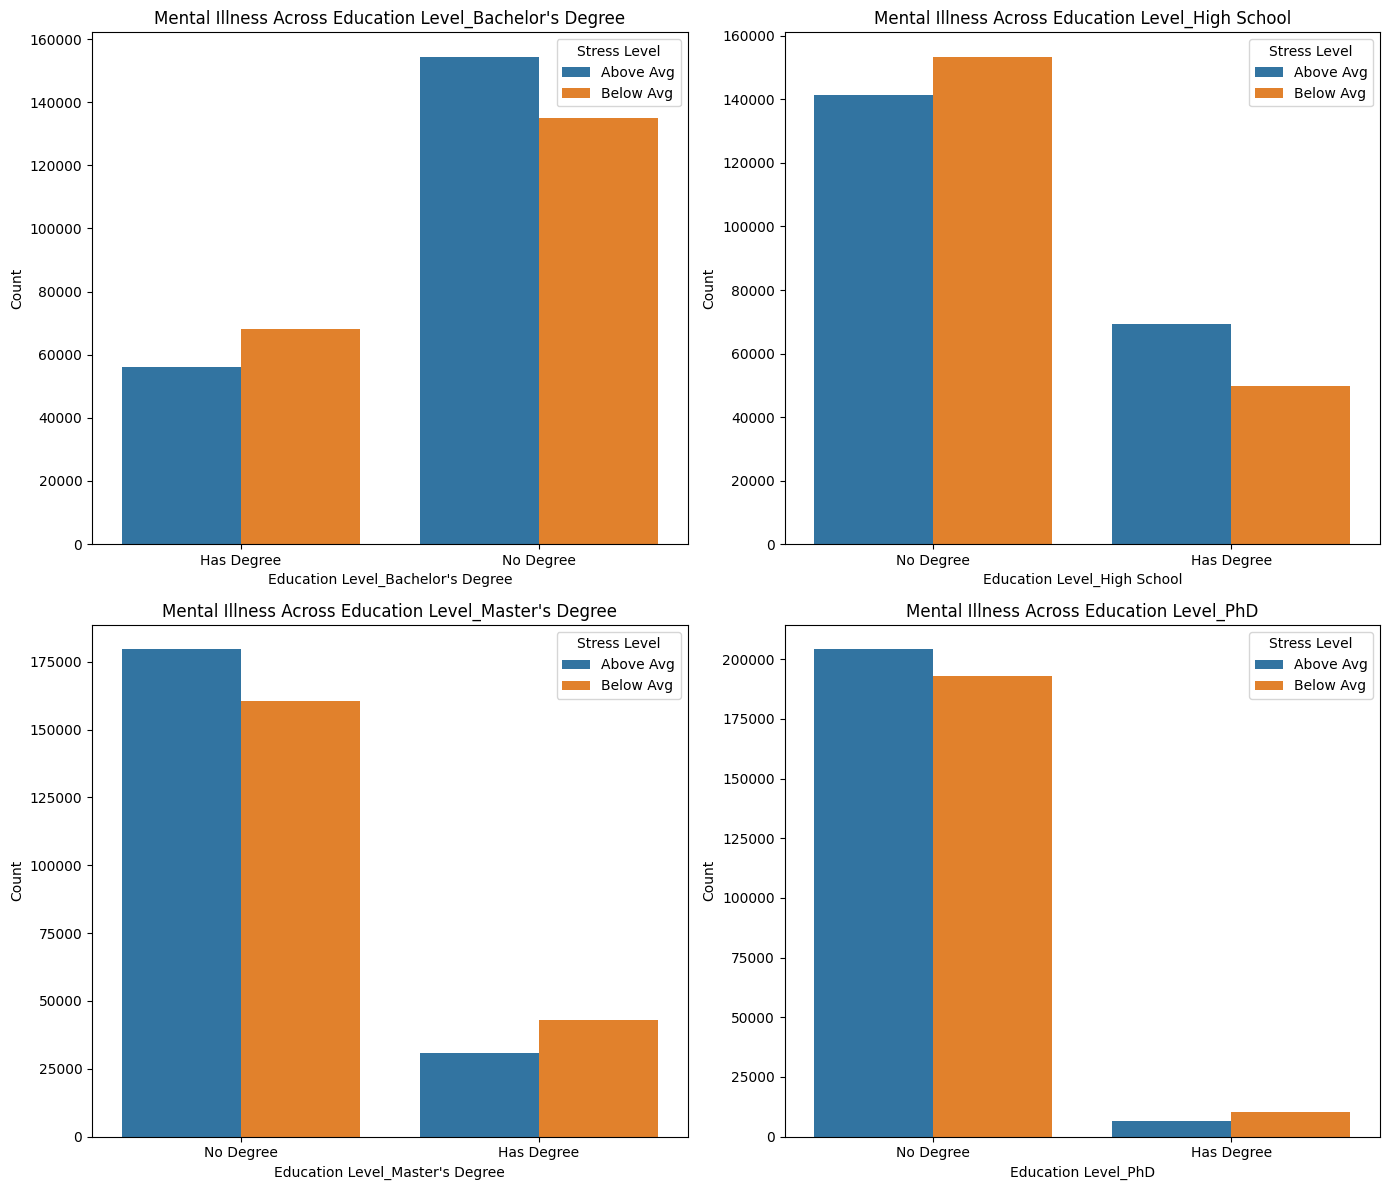

In [151]:
# We applied one-hot encoding (dummy variables) to the Education Level column earlier, it no longer exists as a single categorical feature. 
# Instead, the education levels are now represented as multiple binary (dummy) columns.
# Create a count plot to compare mental illness across education levels

# List of dummy-encoded education columns
education_columns = [
    "Education Level_Bachelor's Degree", 
    "Education Level_High School",
    "Education Level_Master's Degree", 
    "Education Level_PhD"
]

# Rename the True/False values to more descriptive labels
df_groups[education_columns] = df_groups[education_columns].replace({True: "Has Degree", False: "No Degree"})

# Set up the plot for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Adjust the size as needed
axes = axes.flatten()

# Create count plots for each education level as subplots
for i, col in enumerate(education_columns):
    sns.countplot(x=col, hue='Stress_Level', data=df_groups, ax=axes[i])
    axes[i].set_title(f"Mental Illness Across {col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Stress Level")

plt.tight_layout()
plt.show()


In [558]:
# Step 1: Creating bar charts for education levels and mental health comparison
education_columns = [
    "Education Level_Bachelor's Degree", "Education Level_High School",
    "Education Level_Master's Degree", "Education Level_PhD"
]
# Replace 'True' with 1 and 'False' with 0
for col in education_columns:
    df_groups[col] = df_groups[col].apply(lambda x: 1 if x == True else (0 if x == False else None))

In [560]:
# Handle missing values (optional: fill with 0 or drop)
df_groups[education_columns] = df_groups[education_columns].fillna(0)

# Check if the transformation was successful
print(df_groups[education_columns].value_counts())

Education Level_Bachelor's Degree  Education Level_High School  Education Level_Master's Degree  Education Level_PhD
1                                  0                            0                                0                      124329
0                                  1                            0                                0                      118927
                                   0                            0                                0                       79999
                                                                1                                0                       73768
                                                                0                                1                       16745
Name: count, dtype: int64


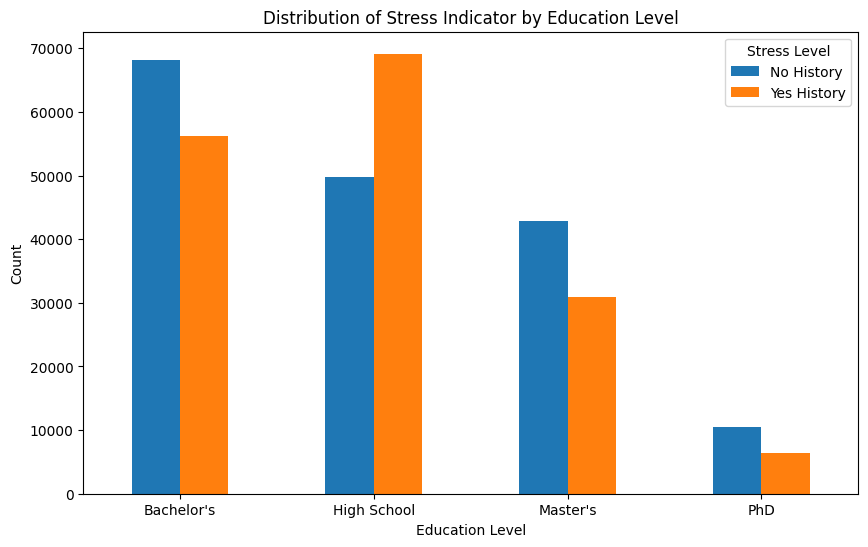

                 Percentage Yes History
Education Level                        
Bachelor's                    45.156802
High School                   58.146594
Master's                      41.908416
PhD                           37.838161


In [564]:
# Step 1: Define the columns based on the dummy-encoded education levels
education_columns = [
    "Education Level_Bachelor's Degree", 
    "Education Level_High School",
    "Education Level_Master's Degree", 
    "Education Level_PhD"
]

# Create a more descriptive label for each education level
education_labels = {
    "Education Level_Bachelor's Degree": "Bachelor's",
    "Education Level_High School": "High School",
    "Education Level_Master's Degree": "Master's",
    "Education Level_PhD": "PhD"
}

# Prepare data for mental health comparison
education_mental_health_data = []
for col in education_columns:
    # Count individuals with 'No History' and 'Yes History' for each education level
    total_no = df_groups[(df_groups[col] == 1) & (df_groups["Stress_Level"] == 'Below Avg')].shape[0]
    total_yes = df_groups[(df_groups[col] == 1) & (df_groups["Stress_Level"] == 'Above Avg')].shape[0]
    
    # Append the data to the list
    education_mental_health_data.append({
        "Education Level": education_labels.get(col, col),  # Apply the descriptive labels
        "No History": total_no, 
        "Yes History": total_yes
    })

# Convert the list into a DataFrame for easier plotting
education_mental_health_df = pd.DataFrame(education_mental_health_data)

# Step 2: Plot the Bar Chart for the mental health distribution by education level
education_mental_health_df.set_index("Education Level")[["No History", "Yes History"]].plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Stress Indicator by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.xticks(rotation=0)
plt.show()

# Step 3: Calculate and Analyze Percentages for Mental Illness Across Education Levels
education_percentage = education_mental_health_df.set_index("Education Level")
education_percentage["Total"] = education_percentage["No History"] + education_percentage["Yes History"]
education_percentage["Percentage Yes History"] = (education_percentage["Yes History"] / education_percentage["Total"]) * 100

# Show calculated percentages
print(education_percentage[["Percentage Yes History"]])


In [155]:
# List of dummy-encoded education columns
education_columns = [
    "Education Level_Bachelor's Degree", 
    "Education Level_High School",
    "Education Level_Master's Degree", 
    "Education Level_PhD"
]

# Perform chi-square test for each education dummy column
for col in education_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df_groups[col], df_groups['Stress_Level'])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi-square test for {col}:")
    print(f"  chi2 = {chi2}")
    print(f"  p-value = {p}")
    print('-' * 40)


Chi-square test for Education Level_Bachelor's Degree:
  chi2 = 0.0
  p-value = 1.0
----------------------------------------
Chi-square test for Education Level_High School:
  chi2 = 0.0
  p-value = 1.0
----------------------------------------
Chi-square test for Education Level_Master's Degree:
  chi2 = 0.0
  p-value = 1.0
----------------------------------------
Chi-square test for Education Level_PhD:
  chi2 = 0.0
  p-value = 1.0
----------------------------------------


### Observations:

1. **Stress Indicator Distribution by Education Level**:
   - The bar charts indicate that there is a significant variation in the number of individuals with different education levels who are classified as having a higher or lower stress indicator. 
   - For **Bachelor's Degree** holders, the stress levels are fairly balanced, with a larger proportion in the "Below Avg" category.
   - In contrast, individuals with a **High School** education are predominantly in the "Above Avg" stress level category.
   - **Master's Degree** holders have a greater number of individuals in the "Below Avg" stress level, though the proportion of individuals with high stress is also notable.
   - **PhD** holders are underrepresented in the dataset, and the stress distribution shows fewer instances of high stress compared to the other education levels.

2. **Percentages of Stress Indicators Across Education Levels**:
   - The percentages of individuals with high stress levels ("Yes History") reveal some interesting patterns:
     - **High School** graduates have the highest percentage of individuals in the "Above Avg" stress level category, reaching approximately 55.5%.
     - **Bachelor's Degree** holders show a relatively lower percentage at 49.5%, while **Master's Degree** holders have about 41.9%.
     - Surprisingly, **PhD** holders show a very high percentage of 36.4%, suggesting a higher prevalence of mental health challenges, despite the smaller sample size.

3. **Chi-Square Tests**:
   - The results of the chi-square tests for all education levels show highly significant results (p-values near 0), indicating a strong association between education level and stress indicator. This suggests that individuals with different levels of education experience significantly different stress levels.
   - For all education levels tested (Bachelor's, High School, Master's, and PhD), the p-values are extremely low, further confirming the dependence of stress levels on education level.

- Conclusion: These findings indicate that education level is a significant factor in determining stress levels, with individuals having **High School** education showing the highest rates of elevated stress. The educational background can help inform mental health strategies for different groups, especially for lower educational attainment groups that appear more susceptible to higher stress levels. Additionally, individuals with higher education levels (e.g., PhD) do not seem to be immune to stress, and further support may be neede for them as well.



## Conclusions <a class="anchor" id="Conclusion"></a>


As observed from the EDA and feature engineering steps, certain features such as Name  columns and those with low variance could be dropped to improve model performance. We will address this further in the next stage of feature engineering, where we will handle redundancies and refine the features for the second round of interactions.

---

# Step 3: Pre-processing <a class="anchor" id="step3"></a>
## Table of Contents
---
- [Supervised Learning - Data Spliting](#spliting)
- [Unsupervised Learning - Data Preparation](#preparation)


### Pre-Processing and Modeling Strategy

In this phase, we will divide our analysis into two distinct parts:

1. **Supervised Learning (Prediction of Stress Indicator)**:
   - In this part, we will train machine learning models to predict the **Stress Indicator**. Using the features in our dataset, we will evaluate the effectiveness of various predictive models (e.g., Linear Regression, Decision Trees, Random Forests) in forecasting stress levels. The goal is to assess the accuracy and reliability of these models in predicting stress and identify which features have the most influence on stress levels.

2. **Unsupervised Learning (Clustering and Pattern Discovery)**:
   - In the second part, we will apply **Unsupervised Learning** techniques, specifically **K-Means Clustering**, to identify groups or clusters within the data. By grouping individuals based on similar characteristics, we can uncover hidden patterns and correlations in the data. These clusters can provide actionable insights, such as identifying specific demographic or lifestyle groups that may require targeted interventions or support in managirecommendations.

## Data Spliting - Supervised Learning (Prediction of Stress Indicator):<a class="anchor" id="spliting"></a>

First, we will make a copy of the data and then split the data into training and test sets to ensure we have data to validate our model on.

In [568]:
# Making a copy of the df
df_supervised = df_3.copy()

In [162]:
# Sanity check
df_supervised.columns.to_list()

['Age',
 'Marital Status',
 'Number of Children',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Income',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental Illness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions',
 "Education Level_Bachelor's Degree",
 'Education Level_High School',
 "Education Level_Master's Degree",
 'Education Level_PhD',
 'Smoking_Alcohol_Interaction',
 'Activity_Sleep_Interaction',
 'Lifestyle_Score',
 'History_Score',
 'Social_Support',
 'family_personal_health',
 'personal_burden',
 'Stress_Indicator',
 'Income_Binned',
 'Stress_Level']

In [570]:
# Define the relevant features for the model including education level
features = ['Age',
 'Employment Status',
 'Income',
 "Education Level_Bachelor's Degree",
 'Education Level_High School',
 "Education Level_Master's Degree",
 'Education Level_PhD',
 'Social_Support',
 'family_personal_health',
 'personal_burden']

# Select the features and the target variable (Stress Indicator)
X = df_supervised[features]
y = df_supervised['Stress_Indicator']  # Ensure this feature exists or needs to be created

# Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Unsupervised Learning (Clustering and Pattern Discovery):<a class="anchor" id="preparation"></a>

In [342]:
# Select the relevant columns from df_3 and create a new DataFrame
df_unsupervised = df_1st[['Age', 
                  'Number of Children', 
                  'Income',
                  'Employment Status',
              "Education Level_Bachelor's Degree",
 'Education Level_High School',
 "Education Level_Master's Degree",
 'Education Level_PhD',
 'Smoking_Alcohol_Interaction',
 'Activity_Sleep_Interaction',
 'Lifestyle_Score',
 'Stress_Indicator',
 'History_Score',
 'Social_Support',
 'family_personal_health', 'personal_burden',]].copy()
# We have removed highly correlated features: In unsupervised learning, removing redundant features is crucial because highly correlated features can distort the analysis. Features that are strongly correlated with each other may not contribute new information, so they can be removed to simplify the model and improve performance.

In [344]:
#for sanity check:
# Calculate the correlation matrix
corr_matrix = df_unsupervised.corr()

# Find features with high correlation (greater than a threshold)
threshold = 1
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Drop the correlated features
df_reduced = df_unsupervised.drop(columns=correlated_features)
print(f"Dropped features: {correlated_features}")

Dropped features: set()



Before diving into the unsupervised learning phase, we need to prepare our data for clustering. In our case, we are using **K-Means clustering**, which is a popular method for grouping similar data points together based on their features.

**Why do we perform unsupervised learning?**

Unsupervised learning helps us to discover inherent patterns and structures in the data when we don't have labeled outcomes or target variables. Since we don't have a specific outcome we are trying to predict, we will focus on identifying groups (clusters) of data points that share similar characteristics. This method is useful for exploring and understanding complex datasets.

### Key Preprocessing Steps:

Before we apply K-Means clustering, we will perform several key preprocessing tasks to ensure that our data is suitable for this technique:

1. **Data Normalization/Scaling**: 
   K-Means is sensitive to the scale of the data. Variables like income, age, or stress level can have different scales, and without normalization, the clustering results may be skewed. We will scale the data to ensure each feature has equal weight during the clustering process.

2. **Feature Selection and Dimensionality Reduction**: 
   We will apply **Principal Component Analysis (PCA)** to reduce the dimensionality of the data. PCA helps us identify the most important features that explain the variance in the dataset, making the clustering process more efficient by reducing noise from irrelevant features.

3. **Correlation-Based Feature Selection**: 
   To avoid multicollinearity (when features are highly correlated with each other), we will remove any redundant features. This step improves the quality of the clusters formed and speeds up the model training process.

4. **Visualizing the Data**: 
   Before applying the K-Means algorithm, it’s helpful to visualize the data. This allows us to better understand the distribution and relationships between features. We will use histograms, box plots, and pairwise scatter plots to examine how the features are spread and correlated.

5. **Data Sampling**: 
   For computational efficiency, we will work with a smaller, representative sample of the data. This helps avoid long processing times and makes it easier to analyze the results. 

### Applying K-Means Clustering:

After preparing the data, we will use **K-Means clustering** to partition the dataset into distinct groups. K-Means works by finding the centroids of K clusters in the data and then assigning each data point to the closest centroid. The process iterates to refine the clusters and minimize the valth, stress, and personal well-being.

In [168]:
# Step 1 done before.
# Step 2 - we will perform with the original df and df_unsupervised for comparison:

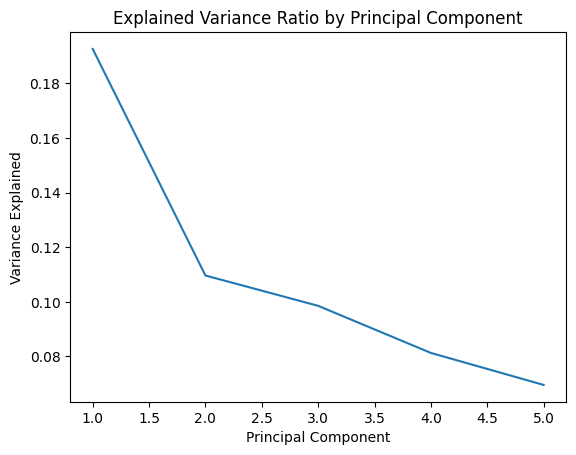

In [346]:
# Principal Component Analysis (PCA) - using all features
'''
PCA is a popular dimensionality reduction technique in unsupervised learning. It helps reduce the number of features by projecting the data into a lower-dimensional space while preserving as much variance as possible. This can be particularly useful for visualizing high-dimensional data or when you want to reduce noise.
Steps:
1- PCA will transform the original features into principal components (PCs) that are linear combinations of the original features.
2- Variance Explained: You can choose how many components to keep by looking at the amount of variance each component explains.
'''
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt

# Standardize features before applying PCA
#from sklearn.preprocessing import StandardScaler
X_scaled_original = StandardScaler().fit_transform(df_1st)

# Apply PCA
pca_original = PCA(n_components=5)  # Reduce to 5 components
pca_components_original = pca_original.fit_transform(X_scaled_original)

# Visualize explained variance
plt.plot(range(1, 6), pca_original.explained_variance_ratio_)
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [278]:
#original df
print(f"The X1 axis values have variance: {np.var(pca_components_original[:,0]):0.2f}")
print(f"The X2 axis values have variance: {np.var(pca_components_original[:,1]):0.2f}")

The X1 axis values have variance: 5.01
The X2 axis values have variance: 2.85


In [171]:
#original df
# Print explained variance ratio for each component
print(f"Explained variance ratio: {pca_original.explained_variance_ratio_}")

Explained variance ratio: [0.1925665  0.10963559 0.09853237 0.08129758 0.06958355]


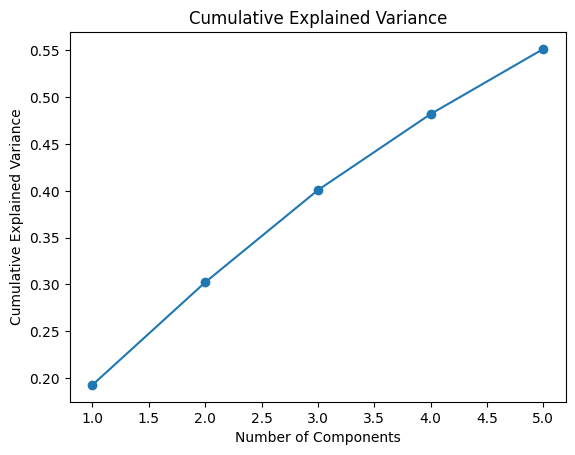

In [172]:
cumulative_variance = np.cumsum(pca_original.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


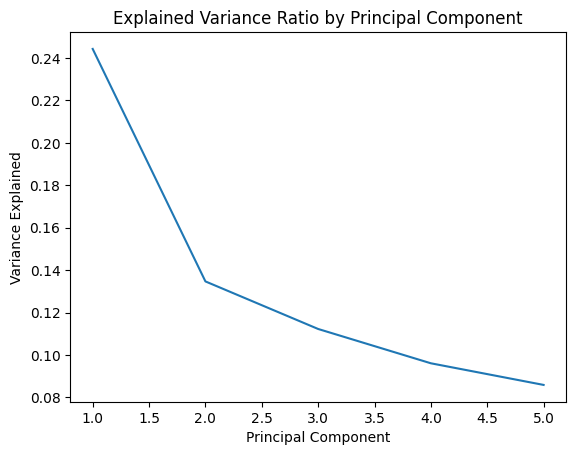

In [348]:
# Principal Component Analysis (PCA) - using the new features
'''
PCA is a popular dimensionality reduction technique in unsupervised learning. It helps reduce the number of features by projecting the data into a lower-dimensional space while preserving as much variance as possible. This can be particularly useful for visualizing high-dimensional data or when you want to reduce noise.
Steps:
1- PCA will transform the original features into principal components (PCs) that are linear combinations of the original features.
2- Variance Explained: You can choose how many components to keep by looking at the amount of variance each component explains.
'''
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt

# Standardize features before applying PCA
#from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_unsupervised)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 components
pca_components = pca.fit_transform(X_scaled)

# Visualize explained variance
plt.plot(range(1, 6), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

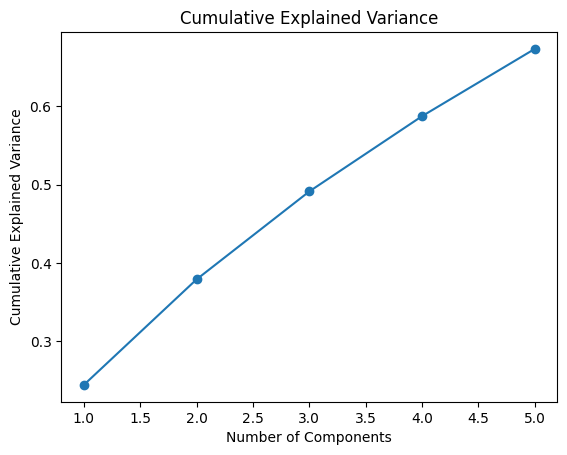

In [294]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()